In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/OnlineNewsPopularity.csv')
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [ ]:
df.shape

(39644, 61)

In [ ]:
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
# removing duplicates
df=df.drop_duplicates()

In [ ]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

In [ ]:
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df[' n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [ ]:
# Drop these items or rows with n_tokens_content = 0
df = df[df[' n_tokens_content'] != 0]

In [ ]:
#Removing Rows with Missing Values
df.dropna(subset=[' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares'], inplace=True)

<ipython-input-91-13755a6aa36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares'], inplace=True)


In [ ]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [ ]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [ ]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [ ]:
#Separating Columns from the main data
df = df.drop(['url'],axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [ ]:
df

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
39639            11.0             346.0         0.529052        9.0   
39640            12.0             328.0         0.696296        9.0   
39641            10.0             442.0         0.516355       24.0   
39642             6.0             682.0         0.539493       10.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0       1.0         0.0              4.680365   
1                 1.0       1.0         0.0              4.913725   
2                 1.0       1.0         0.0              4.393365   
3                 0.0       1.0         0.0              4.404896   
4                19.0      20.0         0.0              4.682836   
...               ...       ...         ...                   ...   
39639             7.0       1.0         1.0              4.523121   
39640             7.0       3.0        48.0              4.405488   
39641             1.0      12.0         1.0              5.076923   
39642             1.0       1.0         0.0              4.975073   
39643             1.0       0.0         2.0              4.471338   

       num_keywords  data_channel_is_lifestyle  ...  min_positive_polarity  \
0               5.0                        0.0  ...               0.100000   
1               4.0                        0.0  ...               0.033333   
2               6.0                        0.0  ...               0.100000   
3               7.0                        0.0  ...               0.136364   
4               7.0                        0.0  ...               0.033333   
...             ...                        ...  ...                    ...   
39639           8.0                        0.0  ...               0.100000   
39640           7.0                        0.0  ...               0.136364   
39641           8.0                        0.0  ...               0.136364   
39642           5.0                        0.0  ...               0.062500   
39643           4.0                        0.0  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050000            0.454545             

In [ ]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg

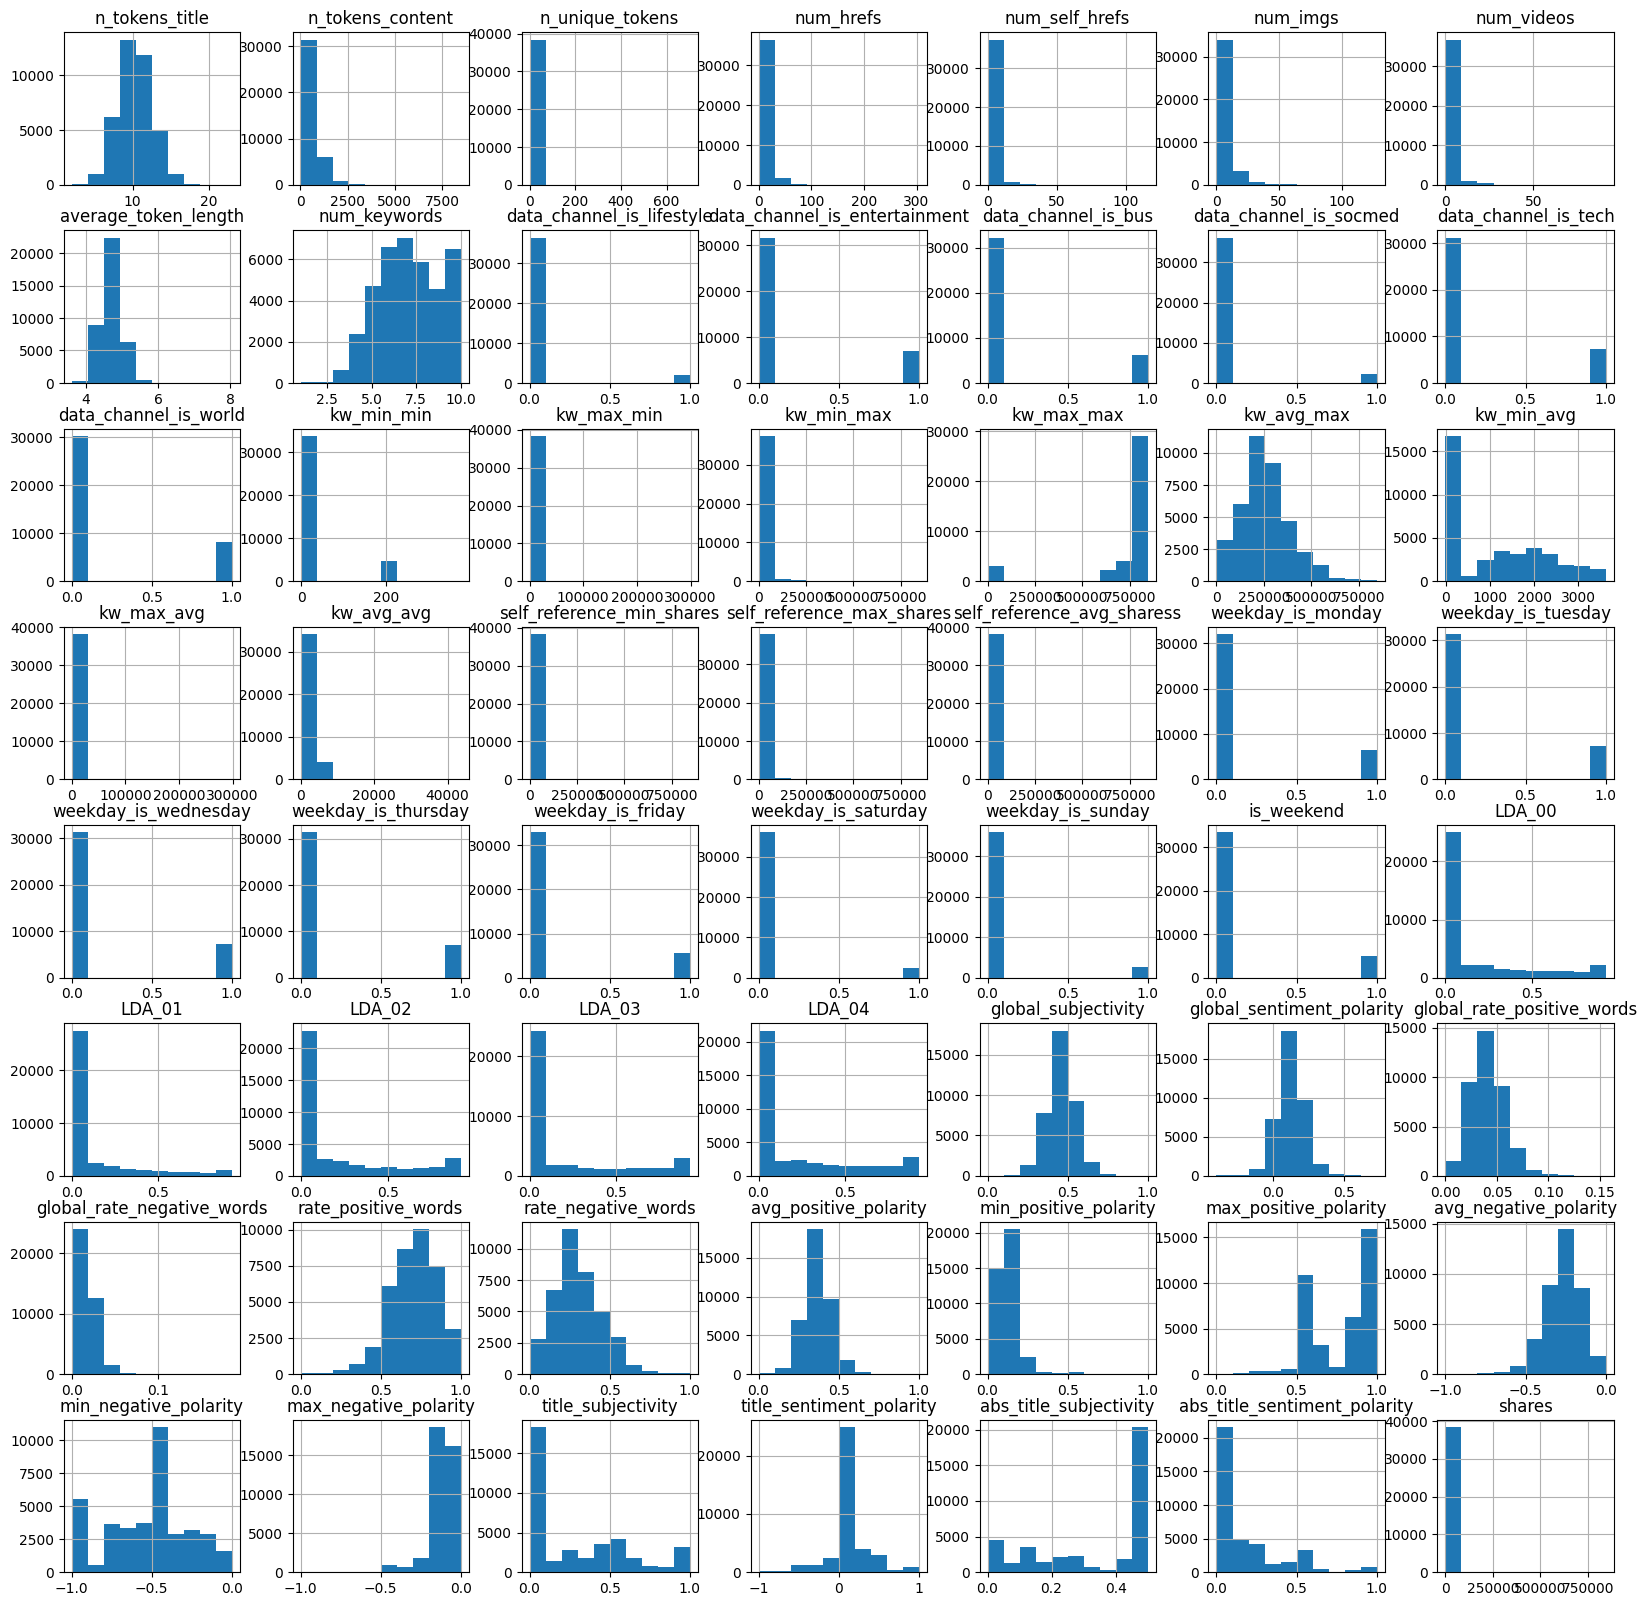

In [ ]:
#Visualize the variable distribution with histograms
df.hist(figsize=(20,20))
plt.show()

In [ ]:
#Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
df['shares'].median()

1400.0

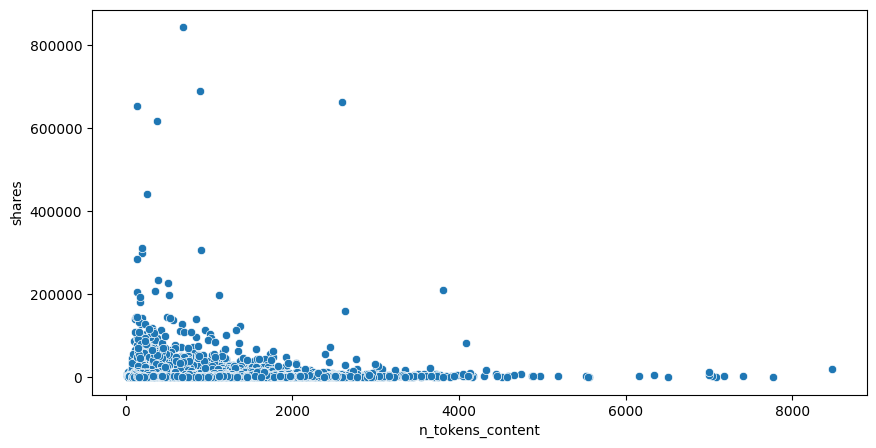

In [ ]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

<ipython-input-102-fec541e0d3df>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');


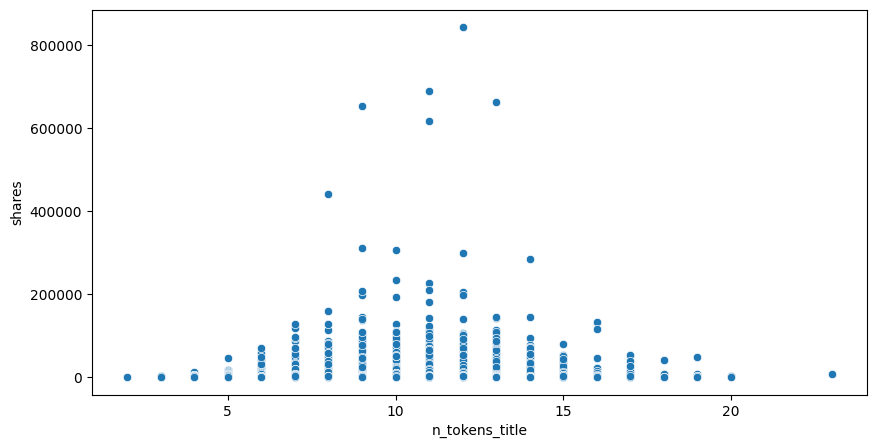

In [ ]:
# Number of words in title vs Number of shares
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');

In [ ]:
# Calculate the mean and median of the 'shares' column
a = df['shares'].mean()
b = df['shares'].median()
a,b

(3355.3603983048642, 1400.0)

In [ ]:
# Extract a subset of columns related to days of the week
Week_day = df.columns.values[26:33]
Week_day

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

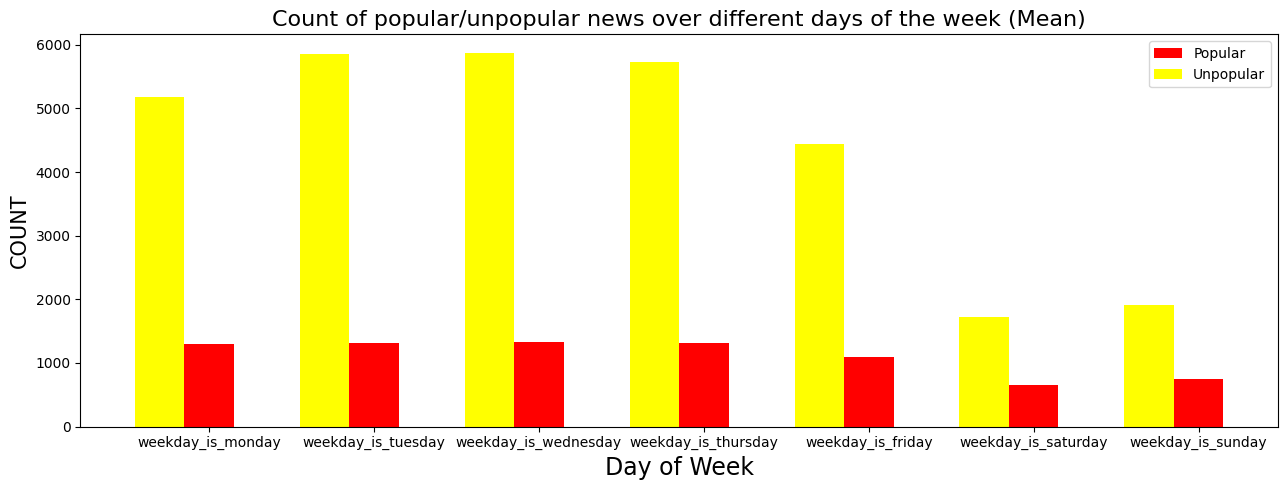

In [ ]:
# Separate the DataFrame into popular and unpopular articles based on the 'shares' threshold 'Mean of article shares'
unpopular = df[df['shares'] < a]
Popular = df[df['shares'] >= a]

# Calculate the sum of day-of-the-week columns for popular and unpopular articles
Unpopular_day = unpopular[Week_day].sum().values
Popular_day = Popular[Week_day].sum().values

# Create a bar plot to visualize the counts of popular and unpopular articles over different days of the week
fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different days of the week (Mean)", fontsize=16)

# Bar plot for popular and Unpopular articles
plt.bar(np.arange(len(Week_day)), Popular_day, width=0.3, align='center', color='red', label='Popular')
plt.bar(np.arange(len(Week_day)) - 0.3, Unpopular_day, width=0.3, align='center', color='yellow', label='Unpopular')

# Set the x-axis labels to represent days of the week
plt.xticks(np.arange(len(Week_day)), Week_day)
plt.ylabel('COUNT', fontsize=15)
plt.xlabel('Day of Week', fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

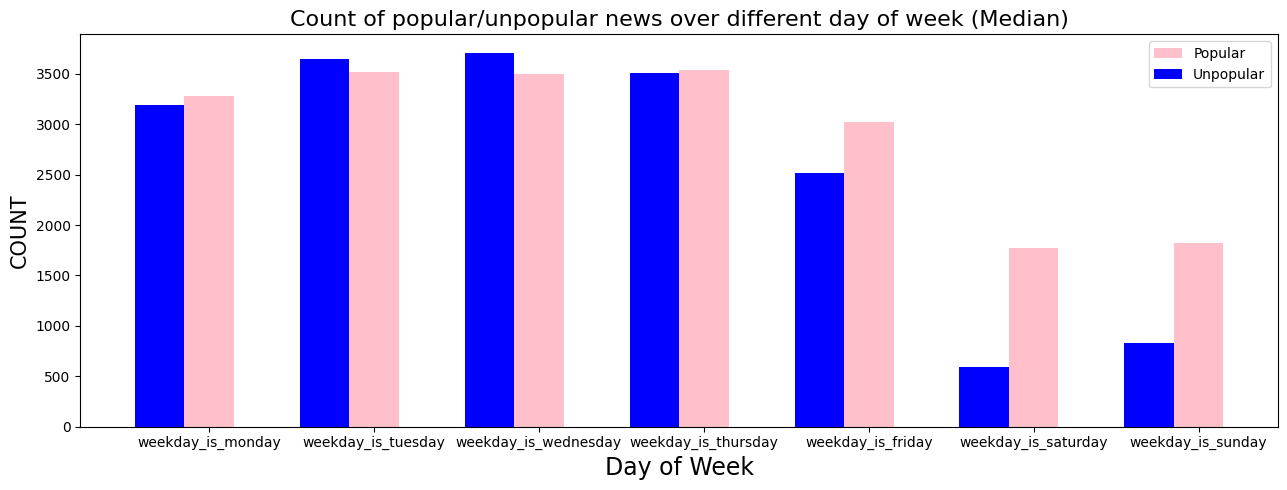

In [ ]:
# Separate the DataFrame into popular and unpopular articles based on the 'shares' threshold 'Median of article shares'
Unpopular2=df[df['shares']<b]
Popular2=df[df['shares']>=b]

# Calculate the sum of day-of-the-week columns for popular and unpopular articles
Unpopular_day2 = Unpopular2[Week_day].sum().values
Popular_day2 = Popular2[Week_day].sum().values

# Create a bar plot to visualize the counts of popular and unpopular articles over different days of the week
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

# Bar plot for popular and Unpopular articles
plt.bar(np.arange(len(Week_day)),Popular_day2,width=0.3,align='center',color='pink',label='Popular')
plt.bar(np.arange(len(Week_day))-0.3,Unpopular_day2,width=0.3,align='center',color='blue',label='Unpopular')

# Set the x-axis labels to represent days of the week
plt.xticks(np.arange(len(Week_day)),Week_day)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
DataChannel = ['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus', 'data_channel_is_tech','data_channel_is_world']

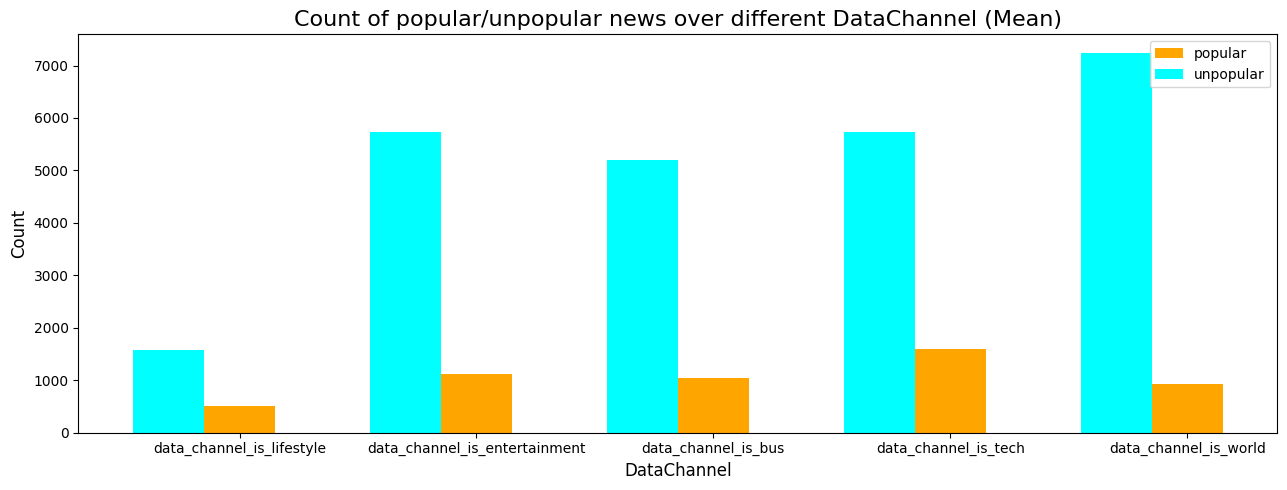

In [ ]:
# Separate the DataFrame into popular and unpopular articles based on the 'shares' threshold 'Mean of article shares'
Unpopular3 = df[df['shares'] < a]
Popular3 = df[df['shares'] >= a]

# Calculate the sum of DataChannel columns for popular and unpopular articles
Unpopular_cat3 = Unpopular3[DataChannel].sum().values
Popular_cat3 = Popular3[DataChannel].sum().values

# Create a bar plot to visualize the counts of popular and unpopular articles over different DataChannel
fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different DataChannel (Mean)", fontsize=16)

# Bar plot for popular and Unpopular articles
plt.bar(np.arange(len(DataChannel)), Popular_cat3, width=0.3, align="center", color='orange', label="popular")
plt.bar(np.arange(len(DataChannel)) - 0.3, Unpopular_cat3, width=0.3, align="center", color='cyan', label="unpopular")

# Set the x-axis labels to represent different DataChannel
plt.xticks(np.arange(len(DataChannel)), DataChannel)
plt.ylabel("Count", fontsize=12)
plt.xlabel("DataChannel", fontsize=12)


plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

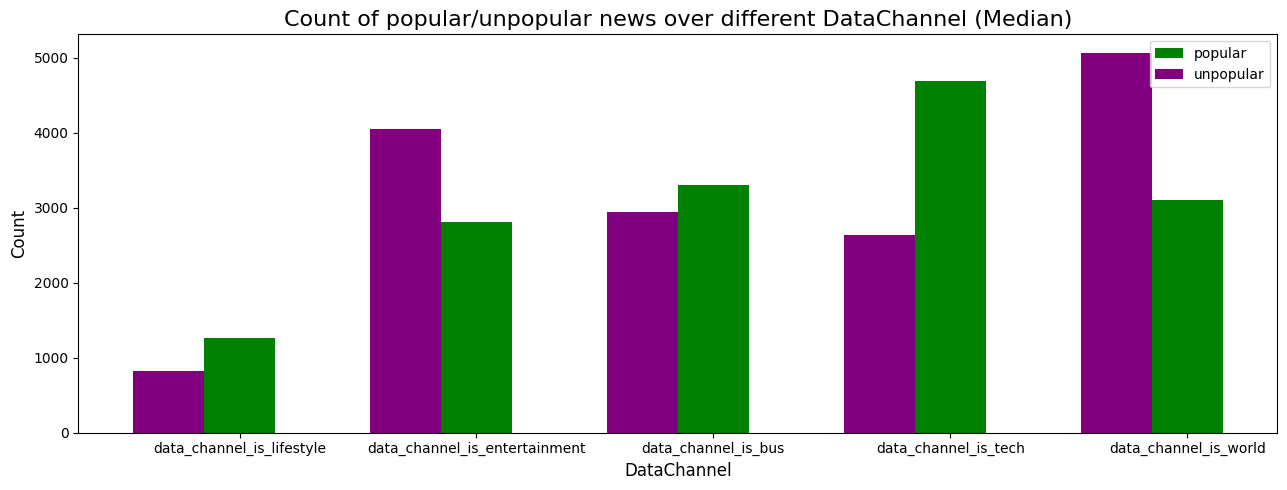

In [ ]:
# Separate the DataFrame into popular and unpopular articles based on the 'shares' threshold 'Median of article shares'
Unpopular4 = df[df['shares'] < b]
Popular4 = df[df['shares'] >= b]

# Calculate the sum of DataChannel columns for popular and unpopular articles
Unpopular_cat4 = Unpopular4[DataChannel].sum().values
Popular_cat4 = Popular4[DataChannel].sum().values

# Create a bar plot to visualize the counts of popular and unpopular articles over different DataChannel
fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different DataChannel (Median)", fontsize=16)

# Bar plot for popular and Unpopular articles
plt.bar(np.arange(len(DataChannel)), Popular_cat4, width=0.3, align="center", color='green', label="popular")
plt.bar(np.arange(len(DataChannel)) - 0.3, Unpopular_cat4, width=0.3, align="center", color='purple', label="unpopular")

# Set the x-axis labels to represent different DataChannel
plt.xticks(np.arange(len(DataChannel)), DataChannel)
plt.ylabel("Count", fontsize=12)
plt.xlabel("DataChannel", fontsize=12)


plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

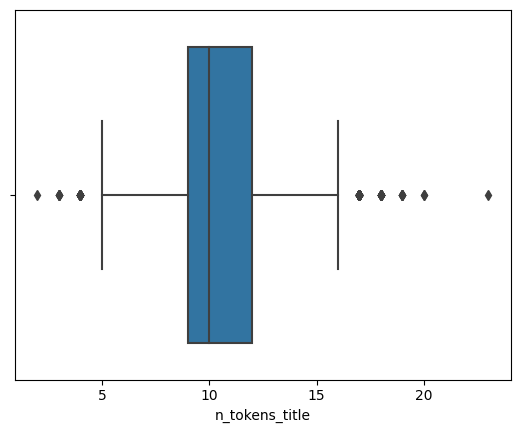

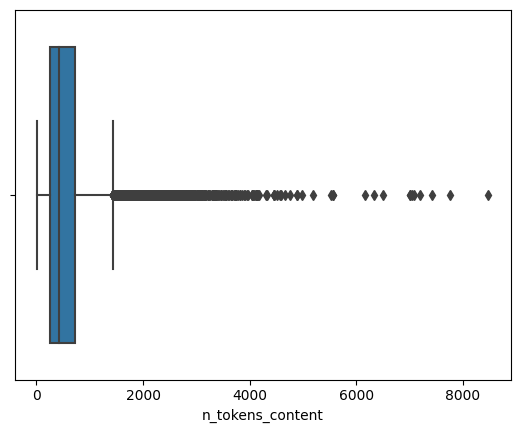

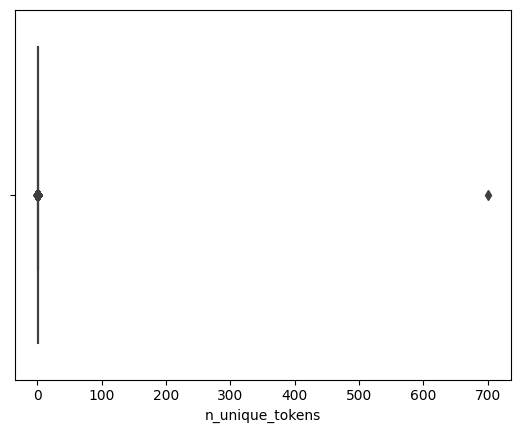

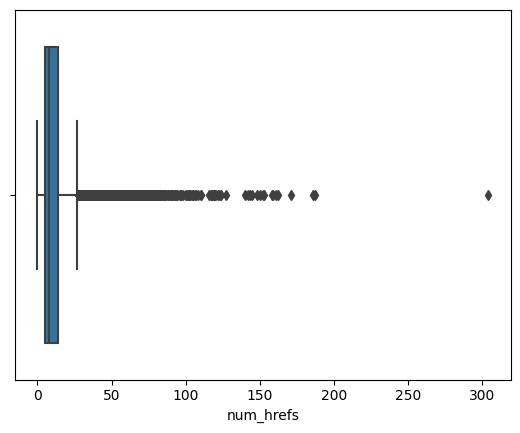

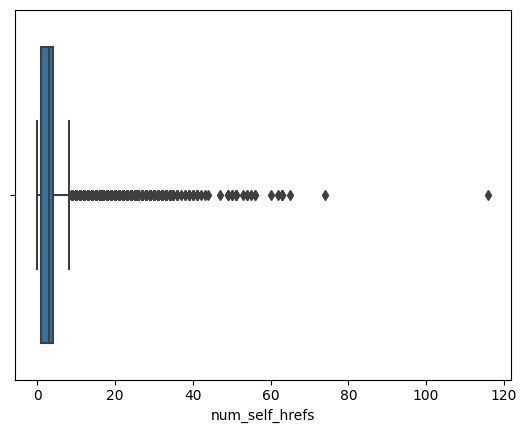

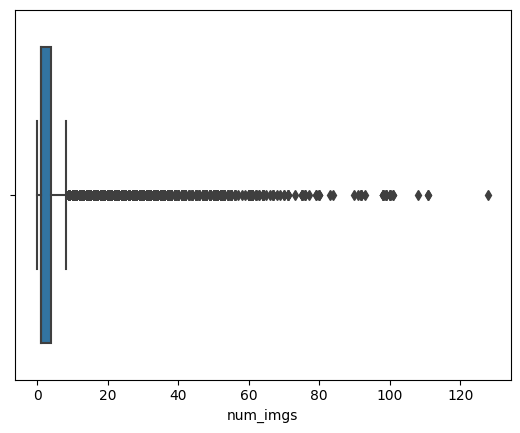

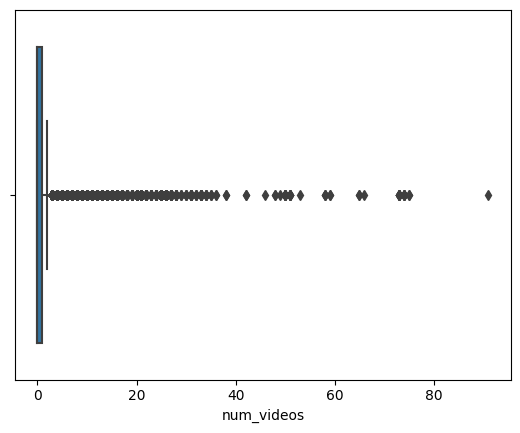

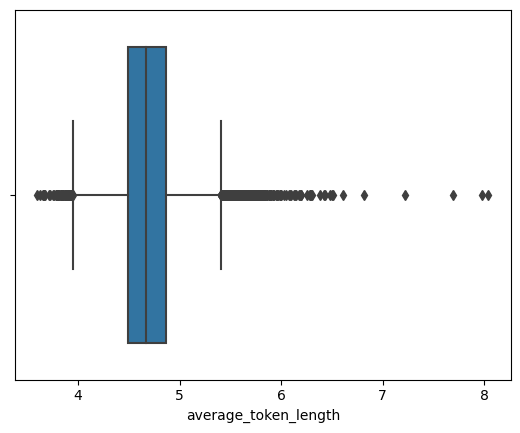

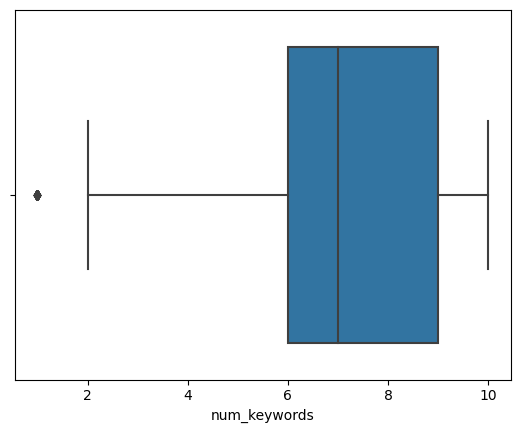

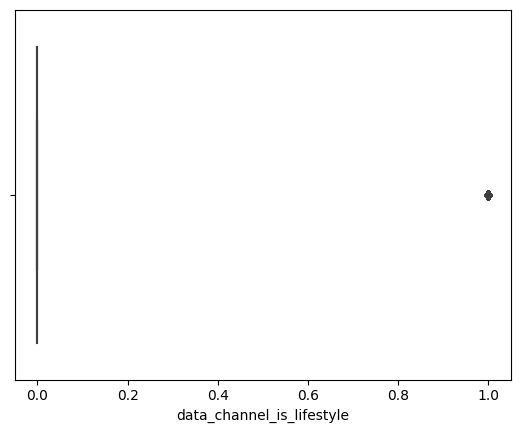

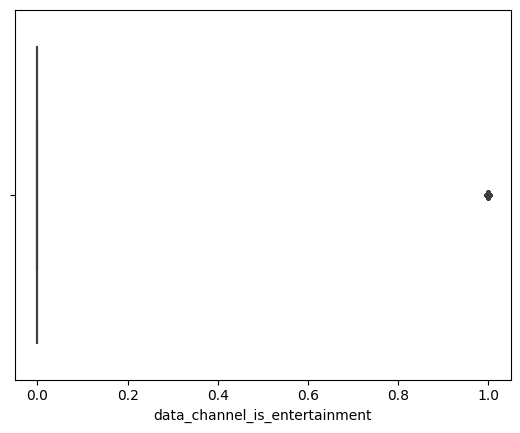

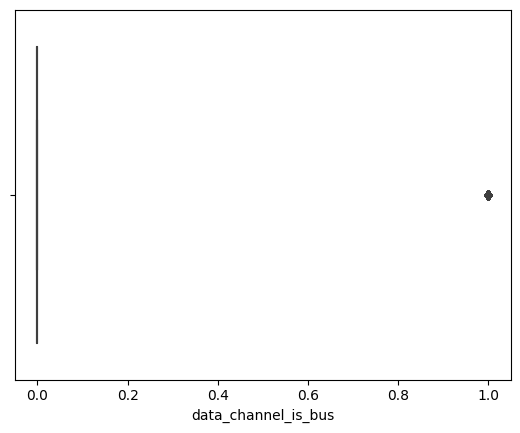

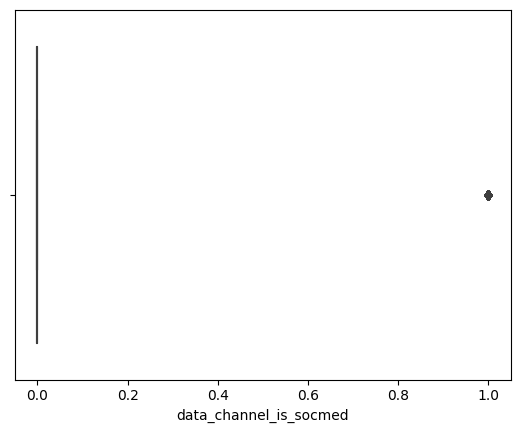

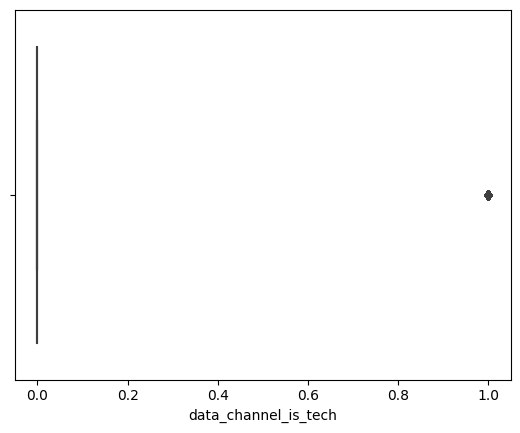

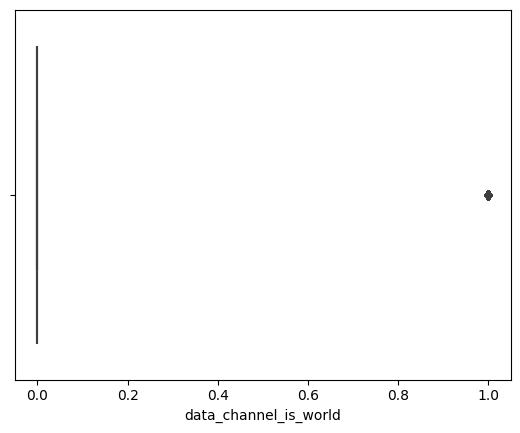

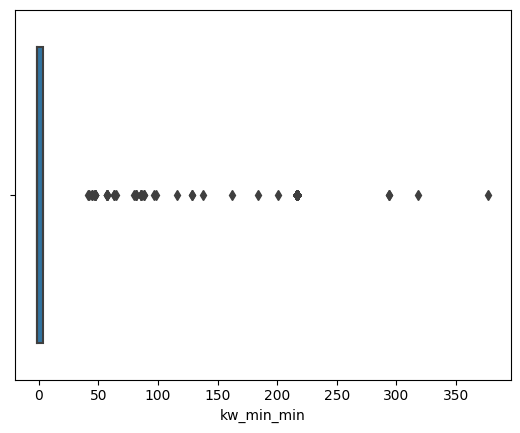

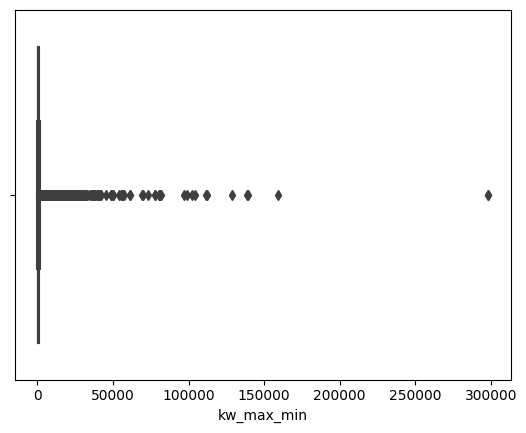

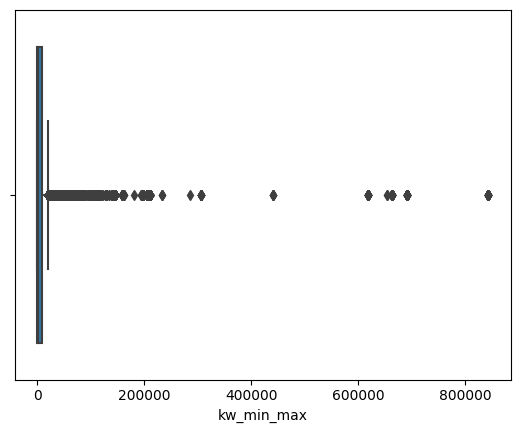

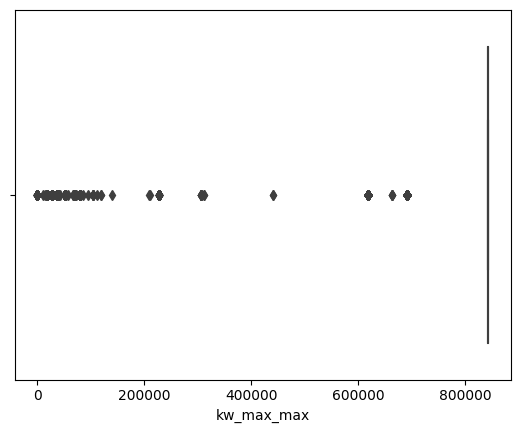

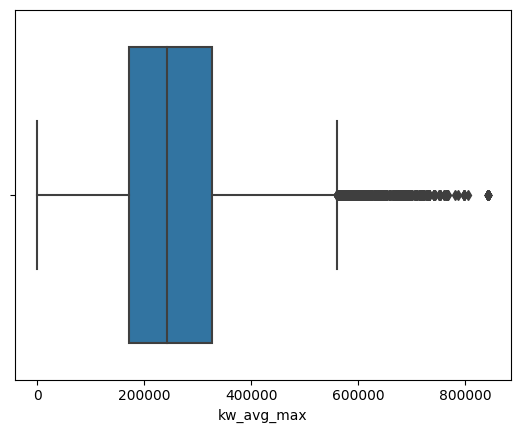

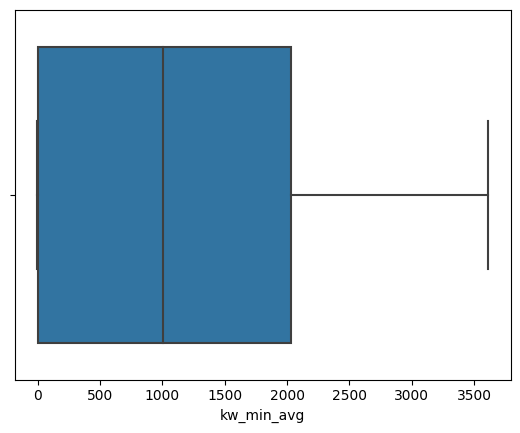

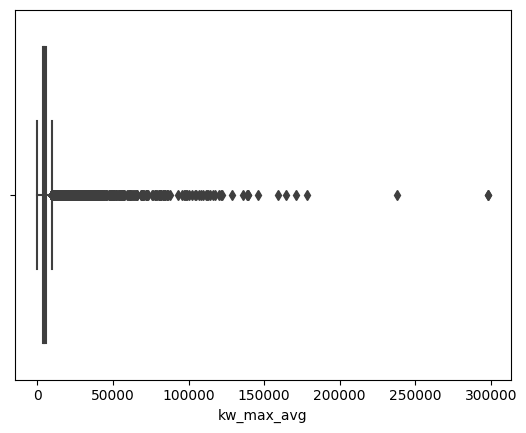

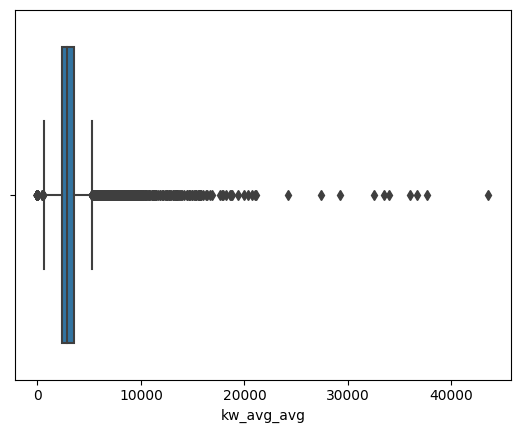

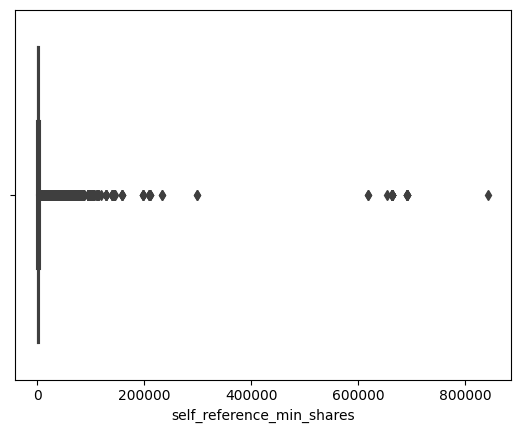

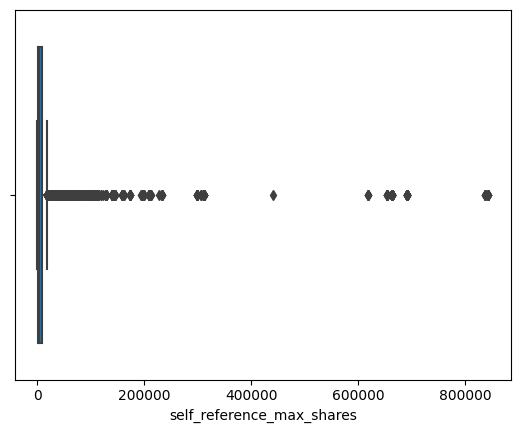

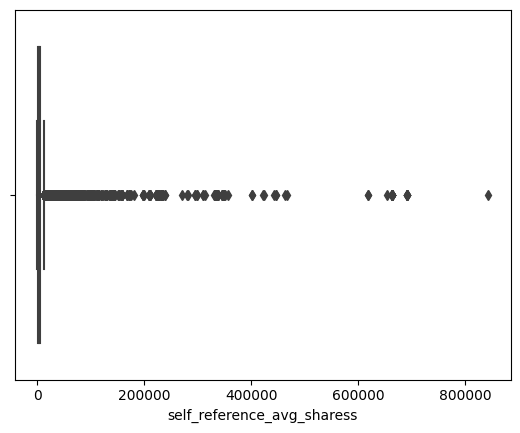

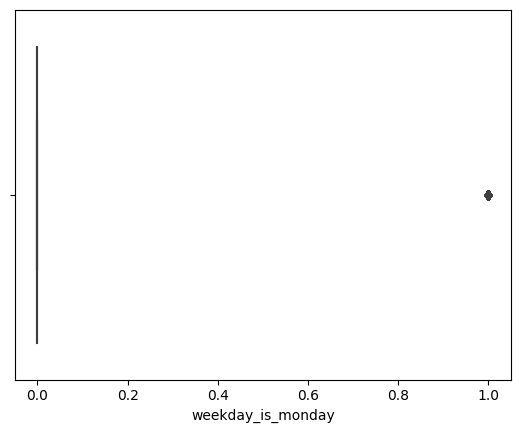

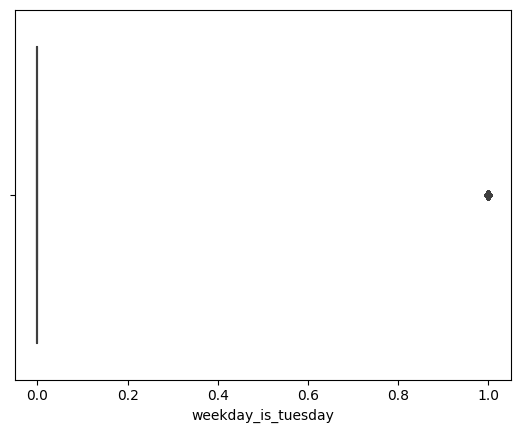

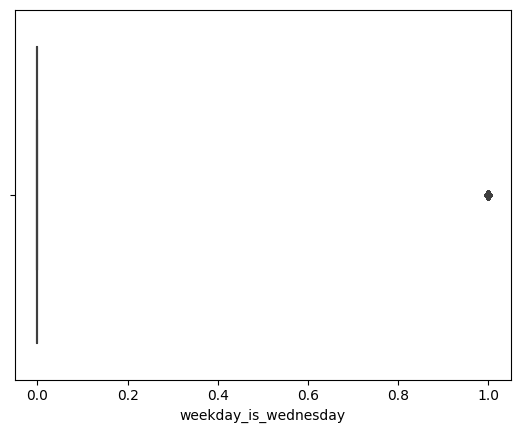

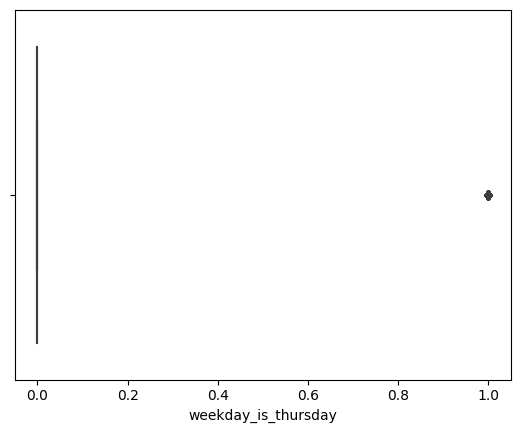

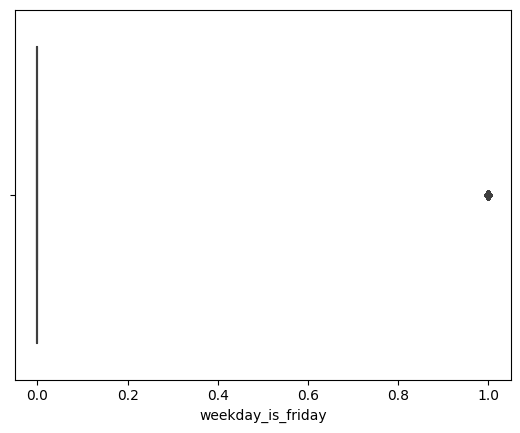

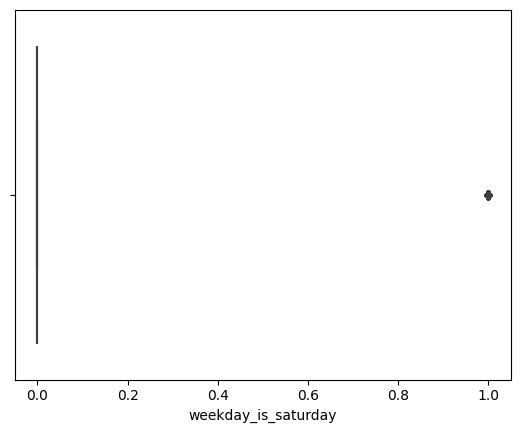

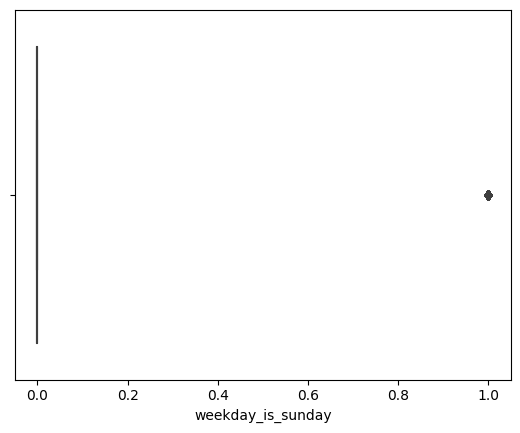

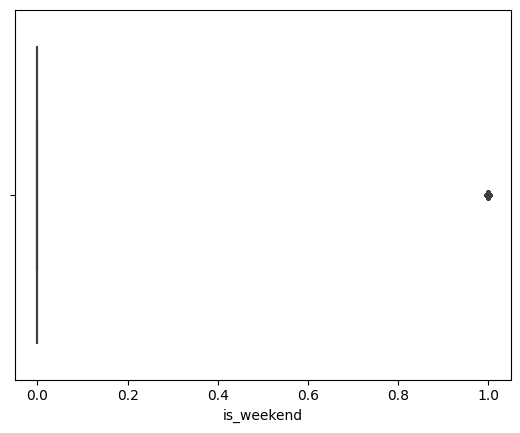

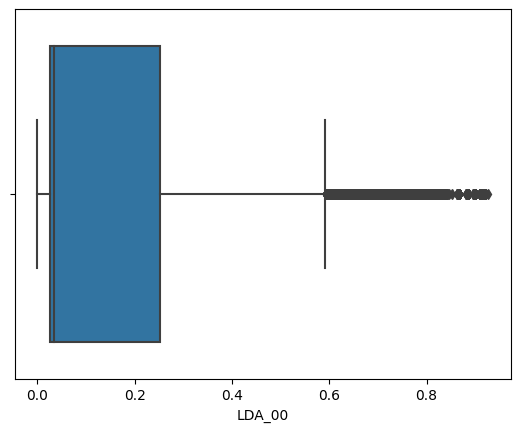

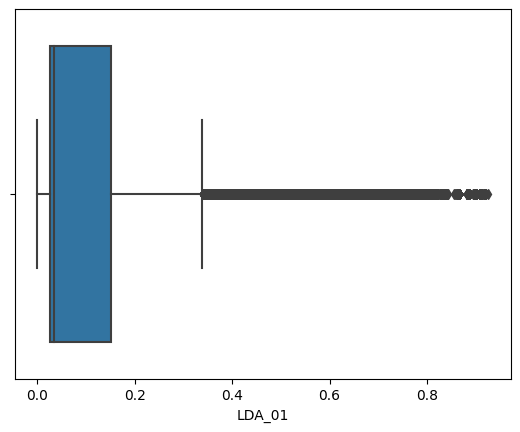

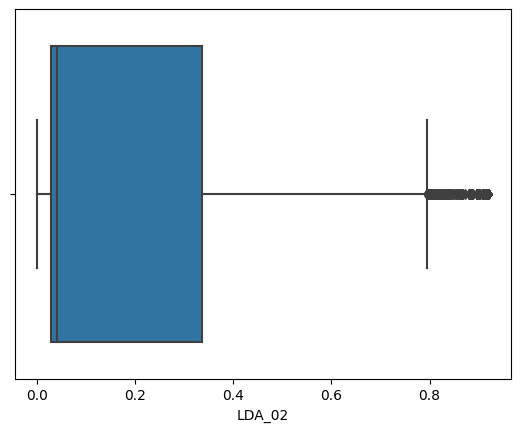

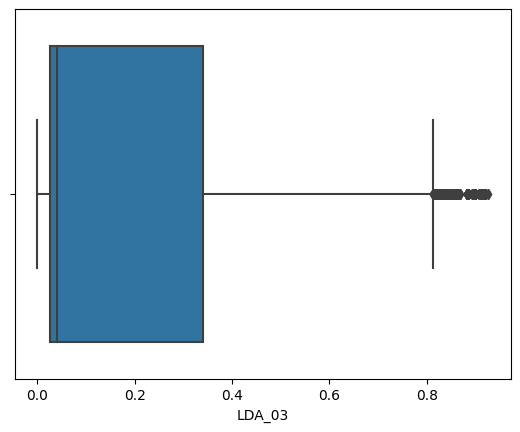

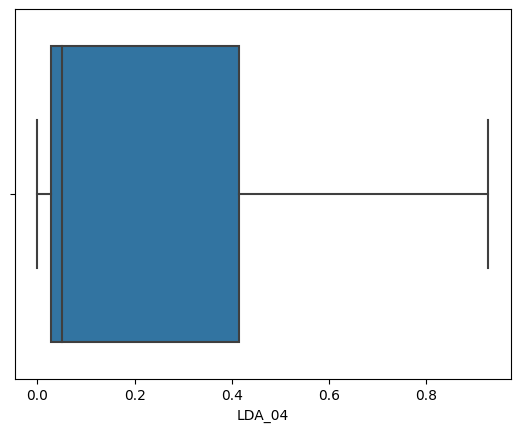

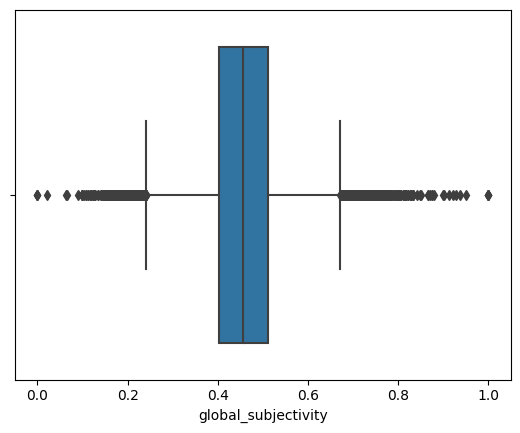

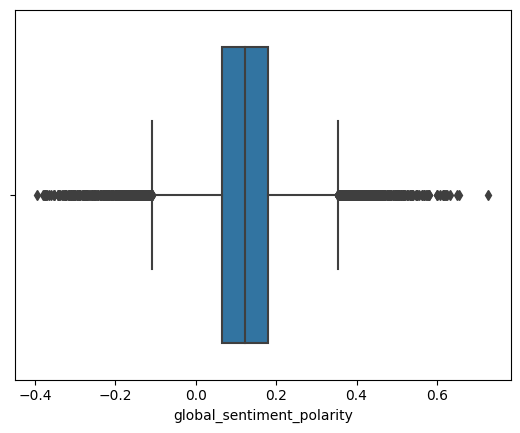

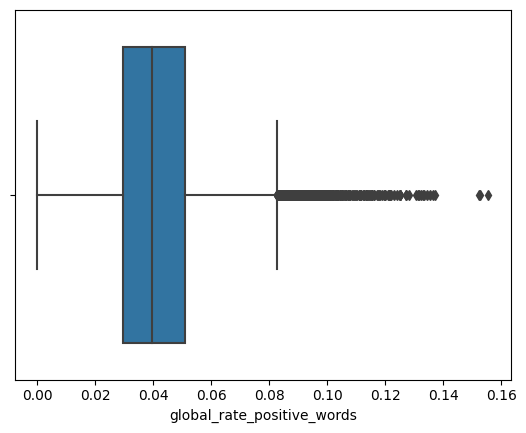

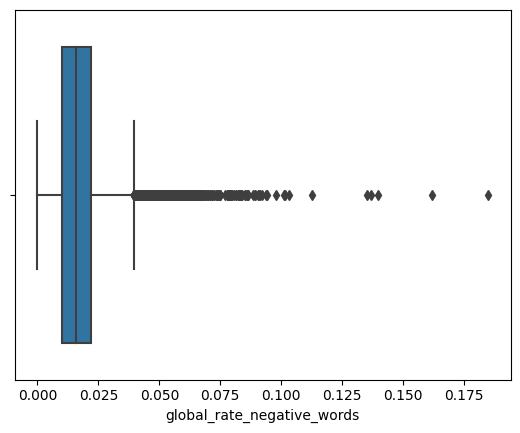

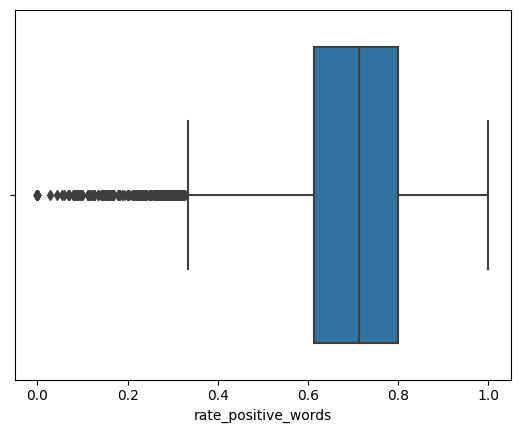

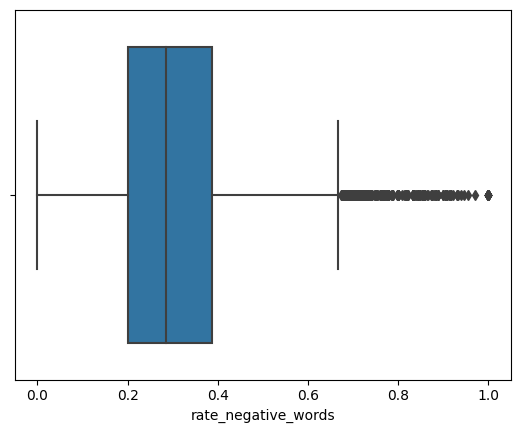

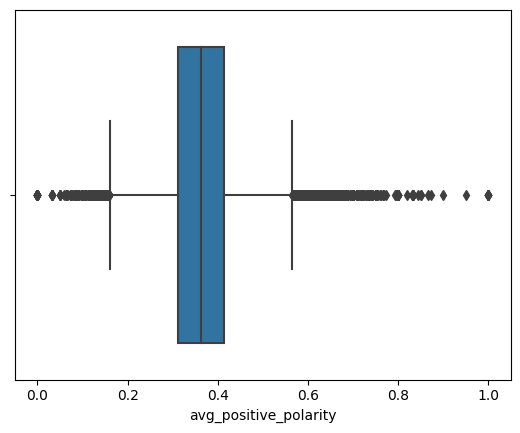

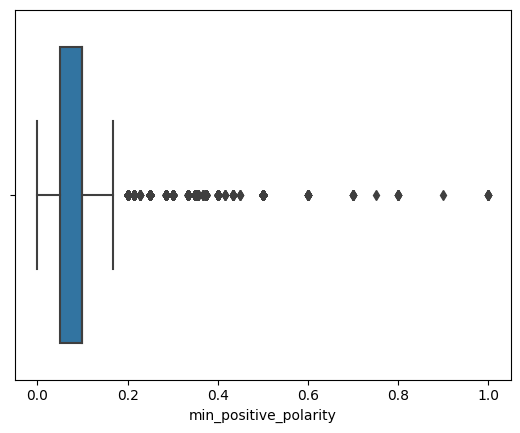

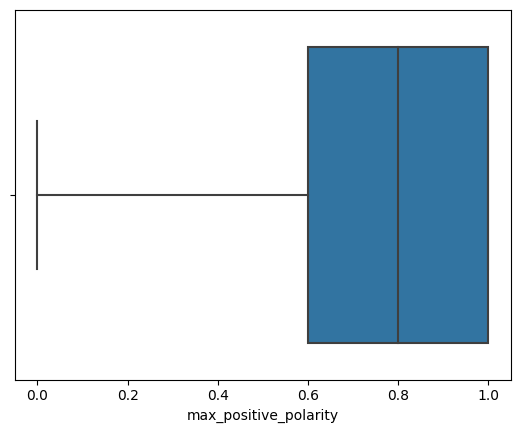

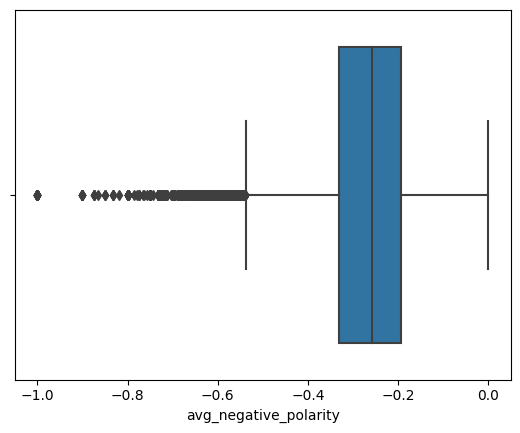

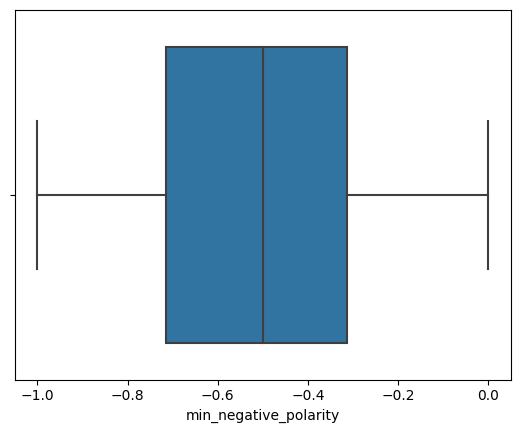

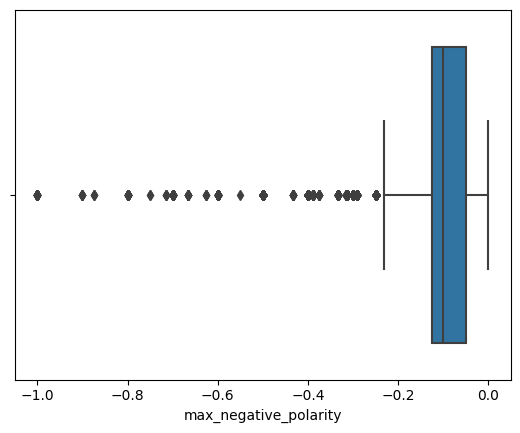

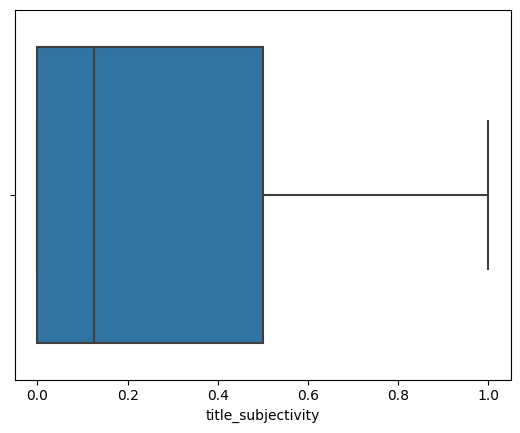

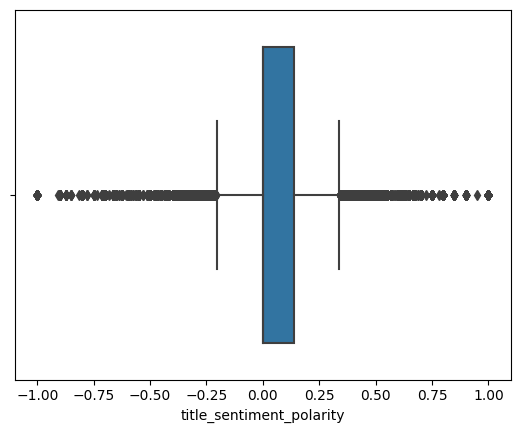

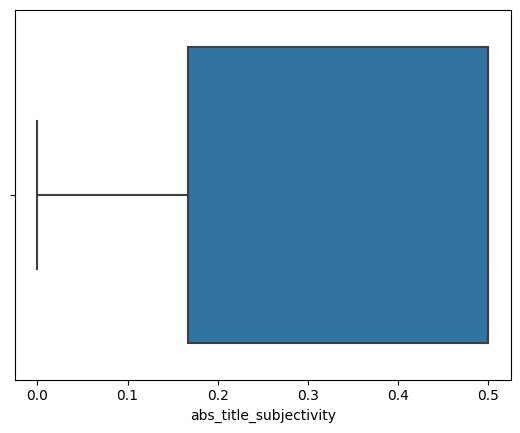

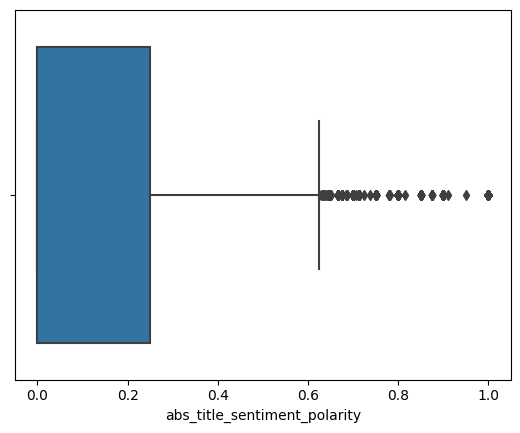

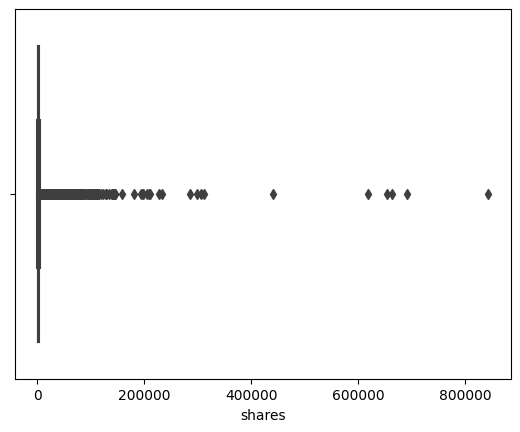

In [ ]:
#Treating outlier
num_cols = df.select_dtypes(['int64', 'float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(data=df, x=num_cols[i], orient="h")
    plt.show()

In [ ]:
# Checking the upper and lower limit
# Counting the number of outliers in different columns
# Iterate through each numerical column in the DataFrame
for column in num_cols:

    # Calculate the first and third quartile
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = q3 - q1

    # Calculate the lower and upper limit for potential outliers
    llimit = q1 - 1.5 * IQR
    ulimit = q3 + 1.5 * IQR

    # Identify and count outliers in the column
    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]

    # Print the number of outliers, lower limit, upper limit, and the IQR for the column
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print('Lower Limit: ' + str(llimit))
    print('Upper Limit: ' + str(ulimit))
    print('IQR: ' + str(IQR))


Number of outliers in "n_tokens_title" : 155
Lower Limit: 4.5
Upper Limit: 16.5
IQR: 3.0
Number of outliers in "n_tokens_content" : 1875
Lower Limit: -446.0
Upper Limit: 1434.0
IQR: 470.0
Number of outliers in "n_unique_tokens" : 490
Lower Limit: 0.27688172230725006
Upper Limit: 0.8116487408852499
IQR: 0.13369175464449995
Number of outliers in "num_hrefs" : 2636
Lower Limit: -8.5
Upper Limit: 27.5
IQR: 9.0
Number of outliers in "num_self_hrefs" : 2090
Lower Limit: -3.5
Upper Limit: 8.5
IQR: 3.0
Number of outliers in "num_imgs" : 7466
Lower Limit: -3.5
Upper Limit: 8.5
IQR: 3.0
Number of outliers in "num_videos" : 2939
Lower Limit: -1.5
Upper Limit: 2.5
IQR: 1.0
Number of outliers in "average_token_length" : 552
Lower Limit: 3.9477737410249993
Upper Limit: 5.410377035785
IQR: 0.36565082369000024
Number of outliers in "num_keywords" : 50
Lower Limit: 1.5
Upper Limit: 13.5
IQR: 3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
Lower Limit: 0.0
Upper Limit: 0.0
IQR: 0.0
Number o

In [ ]:
#removing this ouliers after applying transformation
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [ ]:
# Droping target variable from df2_num
df2_num = df2_num.drop('shares',axis=1)

In [ ]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [ ]:
# Finding negative values
negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [ ]:
#converting negative values to positive values for applying Box-Cox method and creating new feature
for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [ ]:
# Droping old negative column
for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [ ]:
# Checking negative columns
negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [ ]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [ ]:
#Treating outlier
for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [ ]:
# Checking outliers again
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:
    q1 = df2_num_add[column].quantile(0.25)
    q3 = df2_num_add[column].quantile(0.75)
    IQR = q3 - q1

    llimit = q1 - 1.5*IQR
    ulimit = q3 + 1.5*IQR

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330856397202
-0.1145799574171531
0.2575382820556418
Number of outliers in "average_token_length" : 0
0.7213218976211406
0.7805063649014632
0.01479611682008064
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914342191073
2.872819482290186
0.8756277291273233
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.157

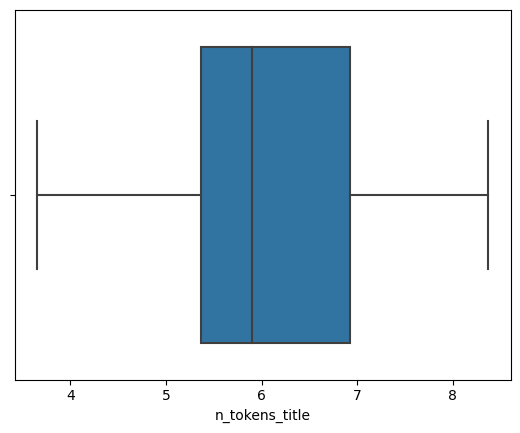

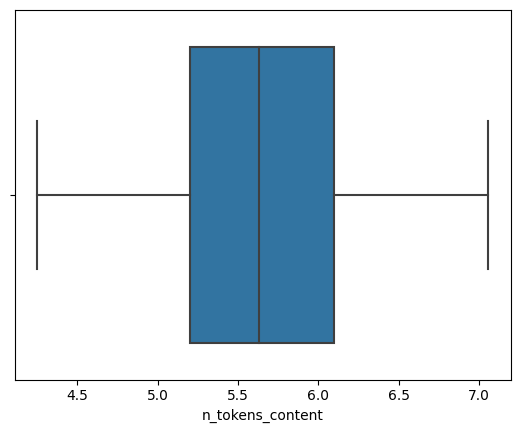

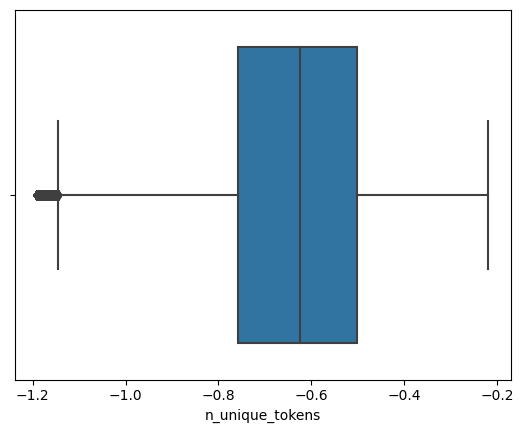

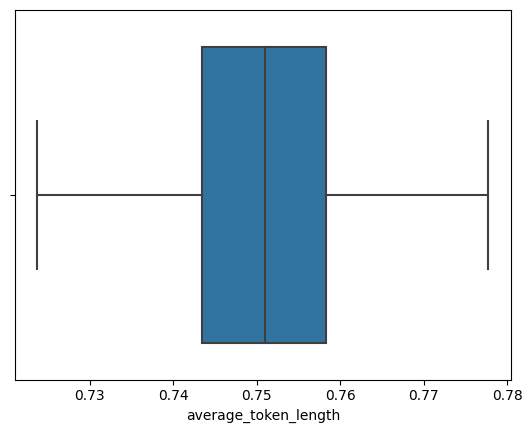

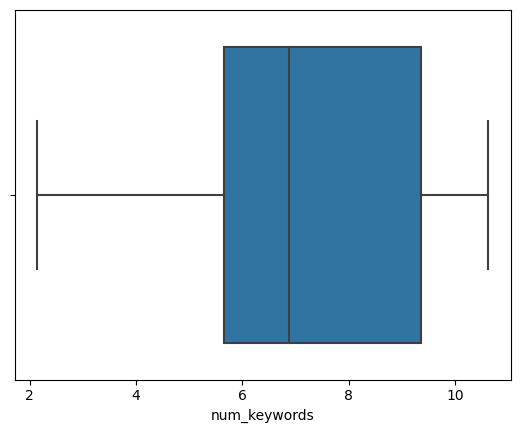

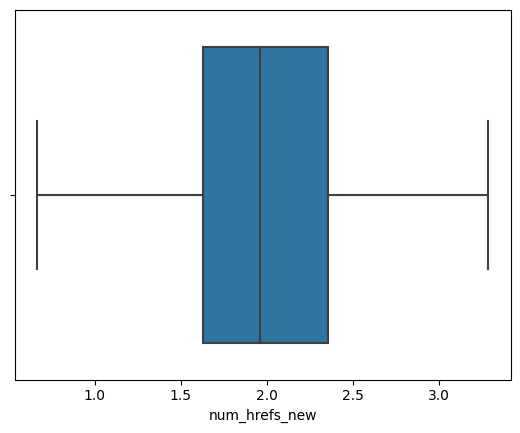

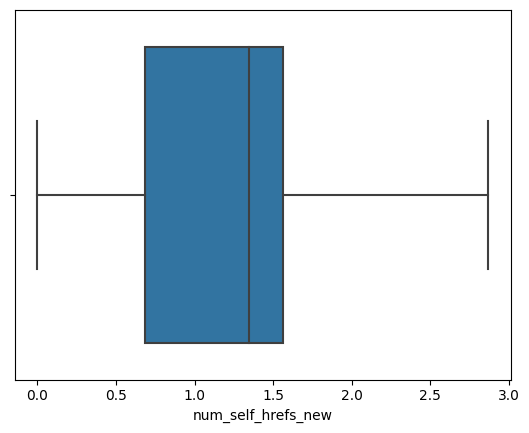

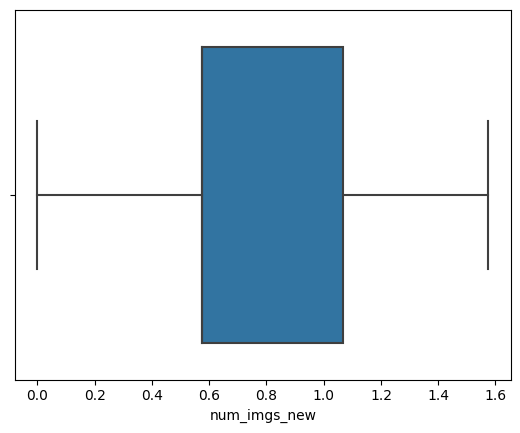

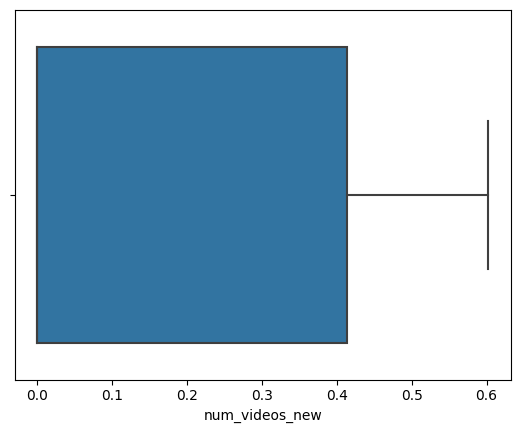

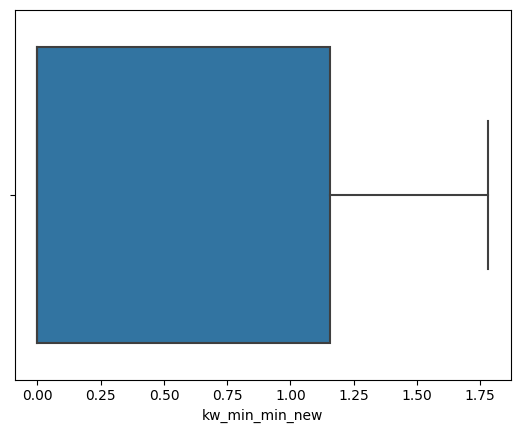

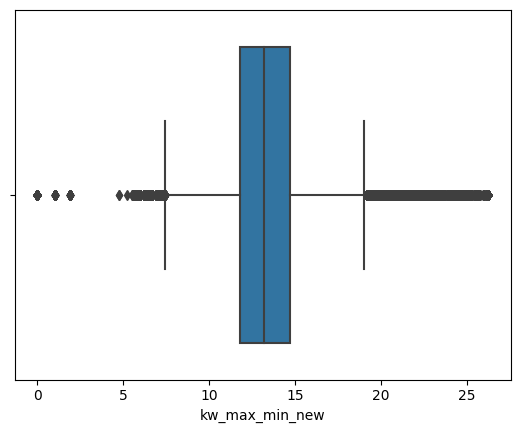

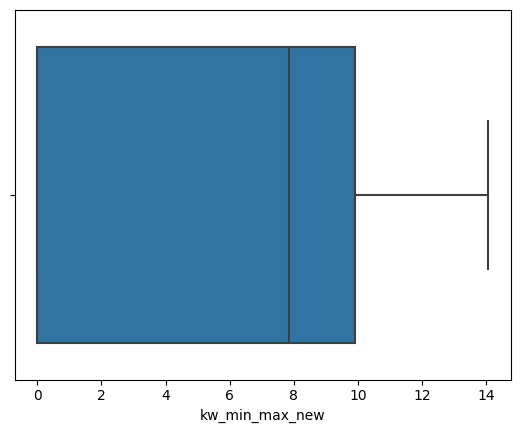

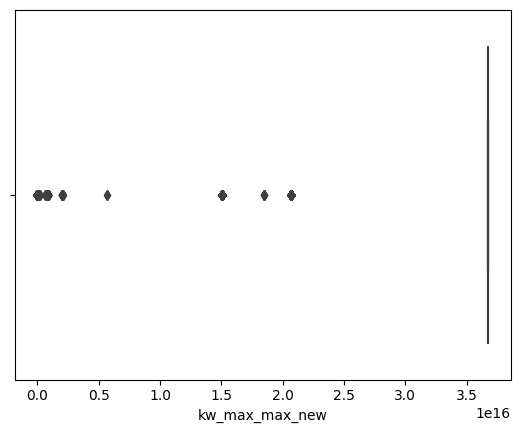

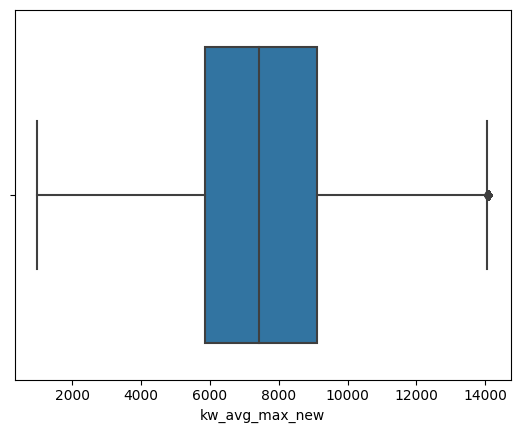

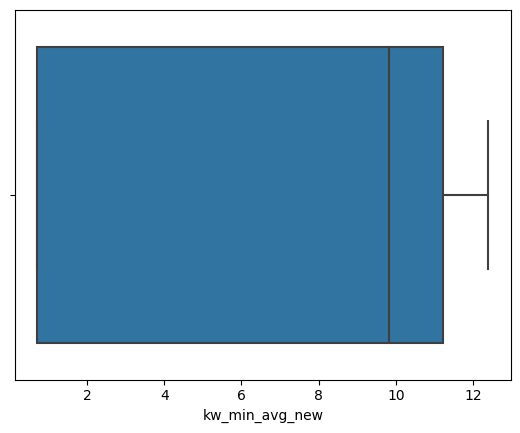

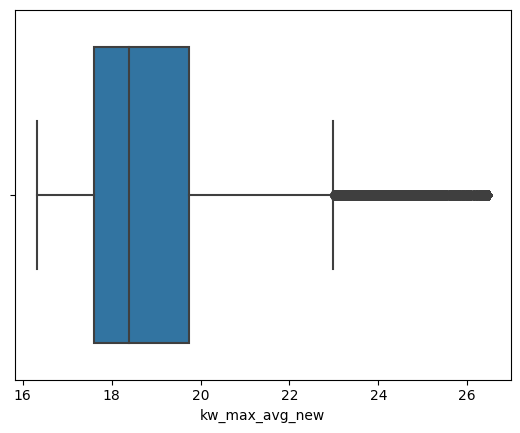

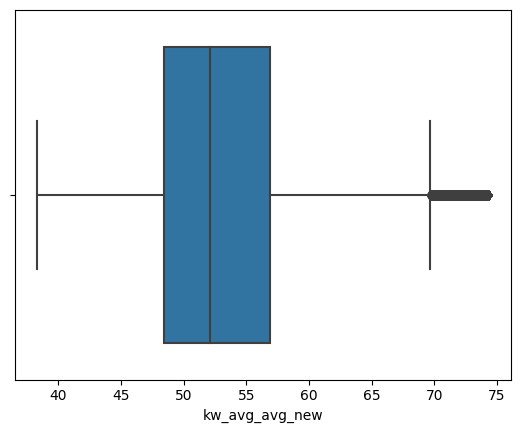

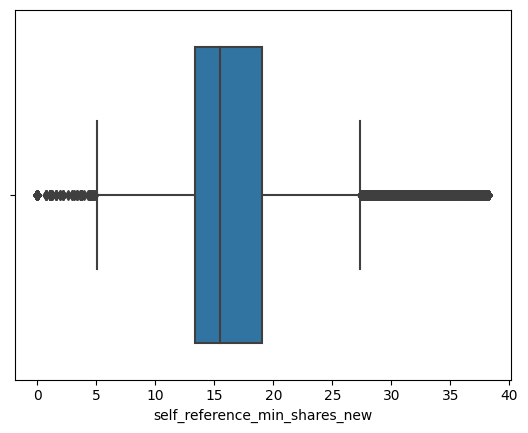

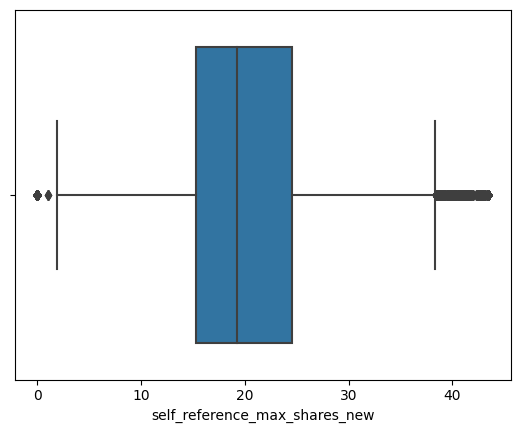

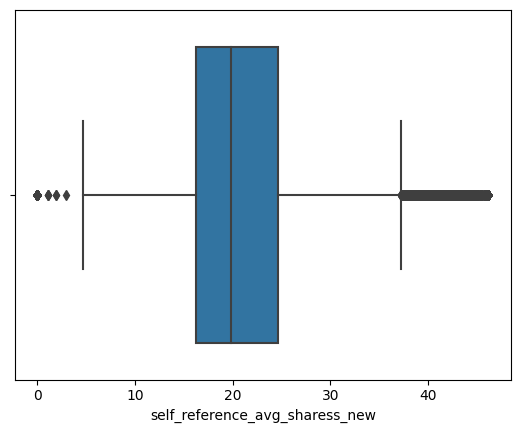

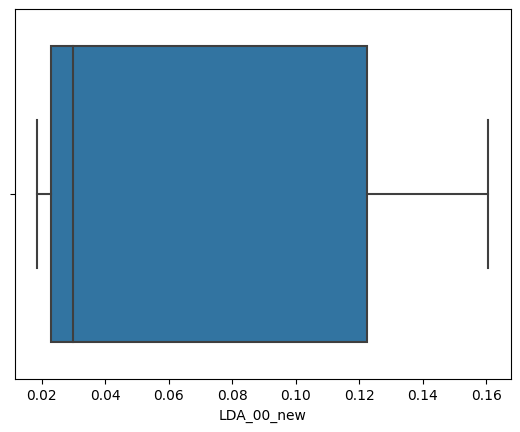

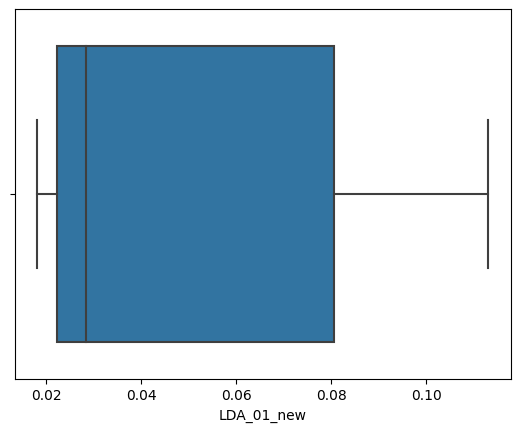

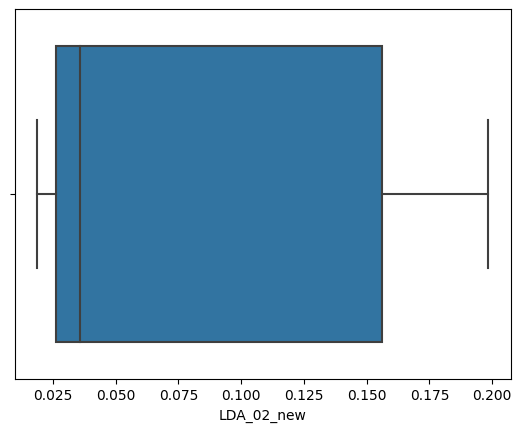

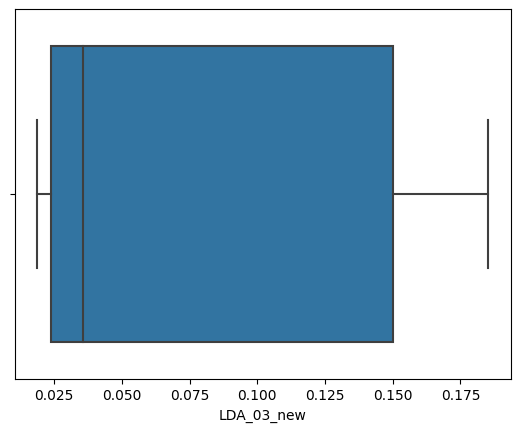

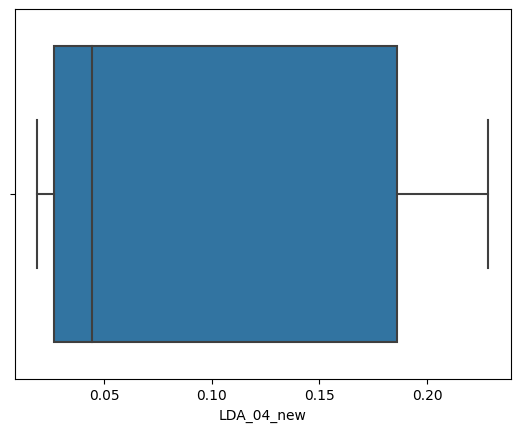

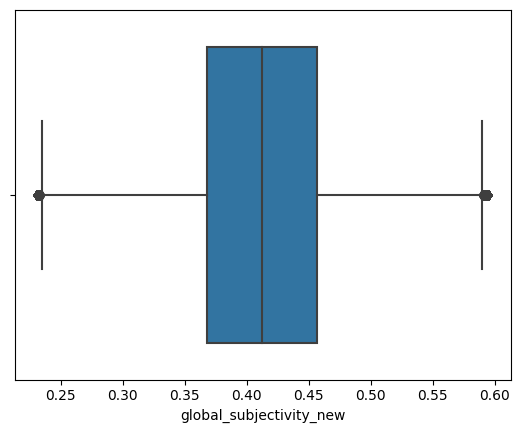

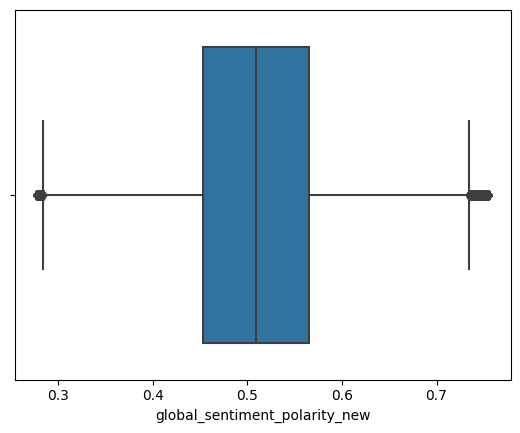

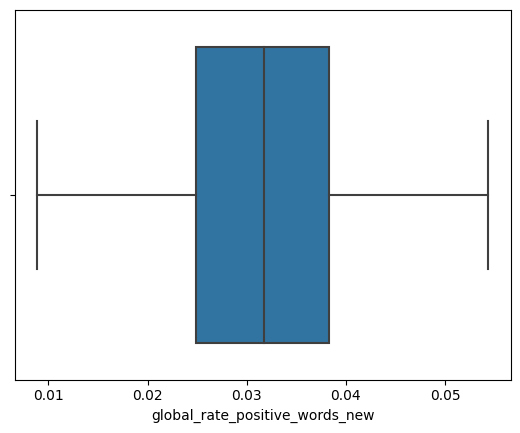

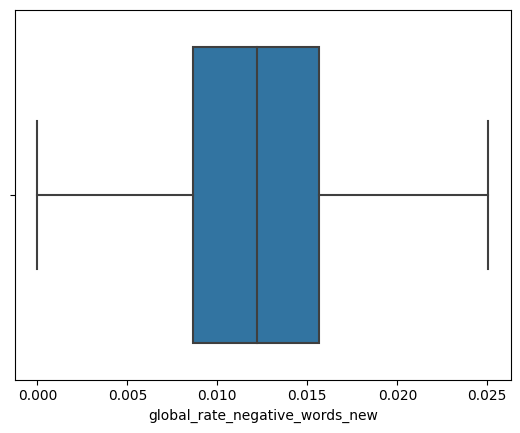

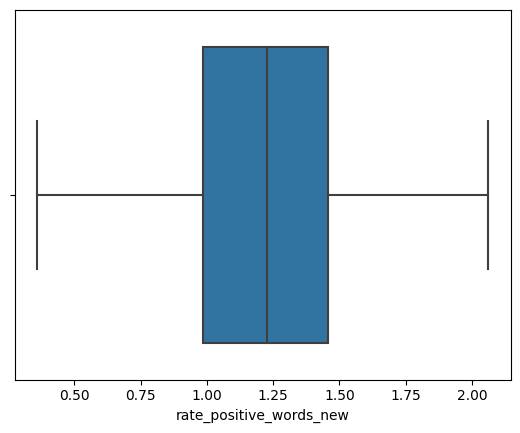

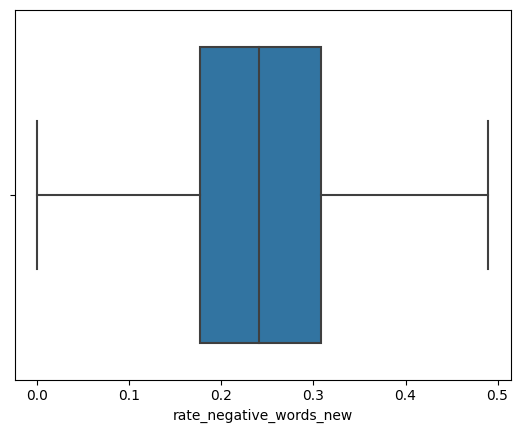

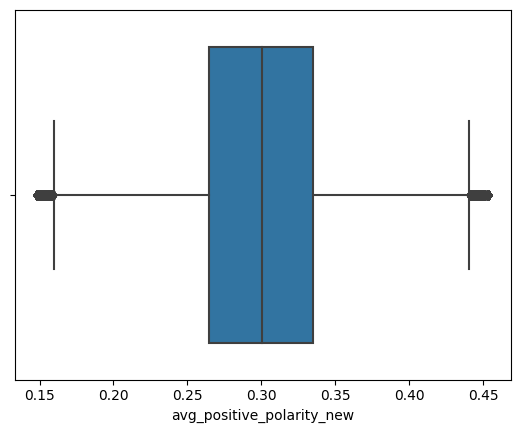

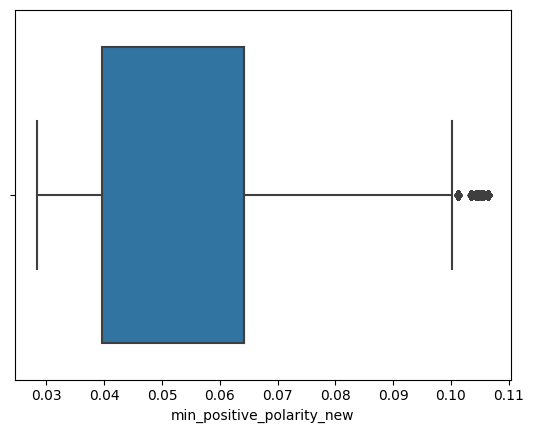

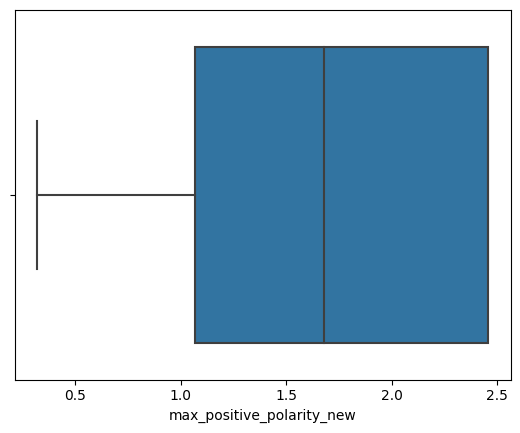

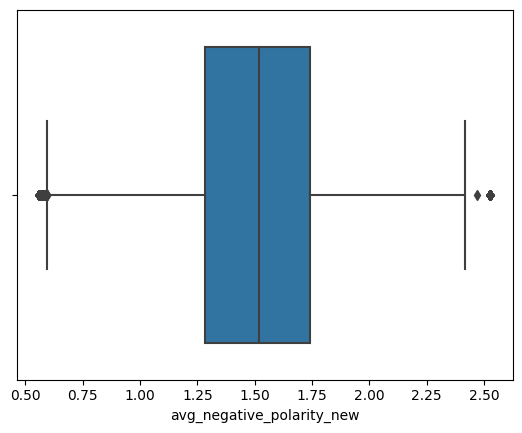

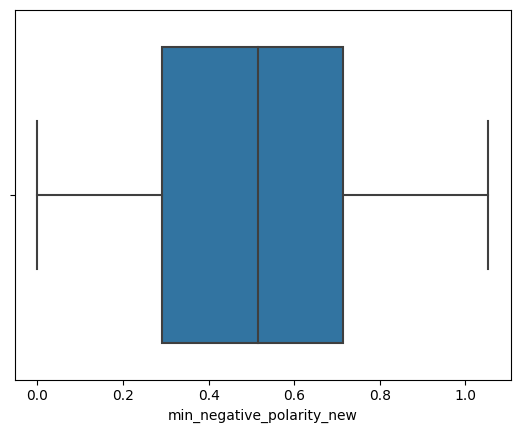

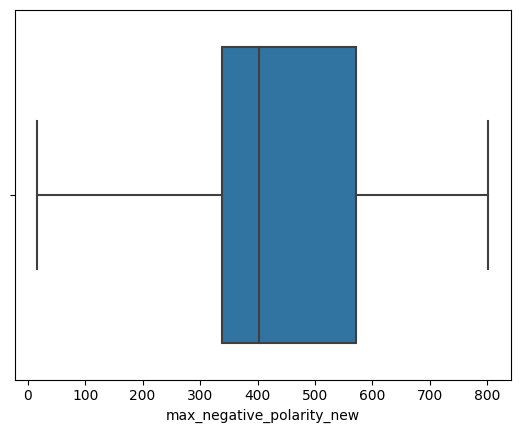

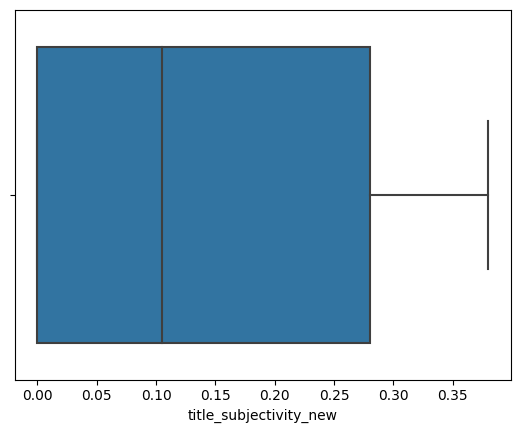

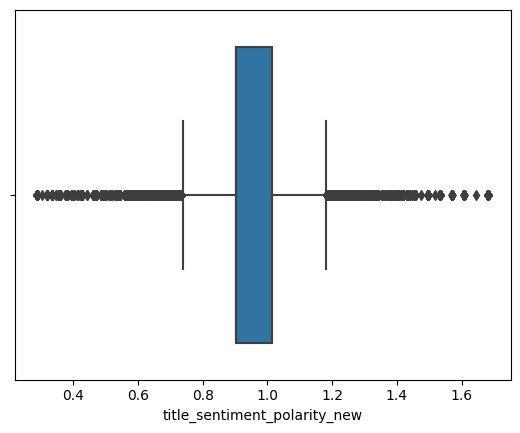

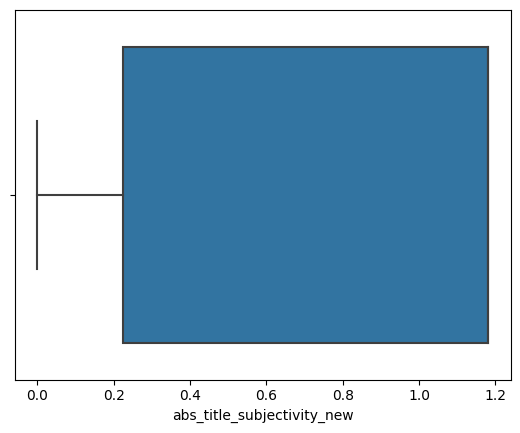

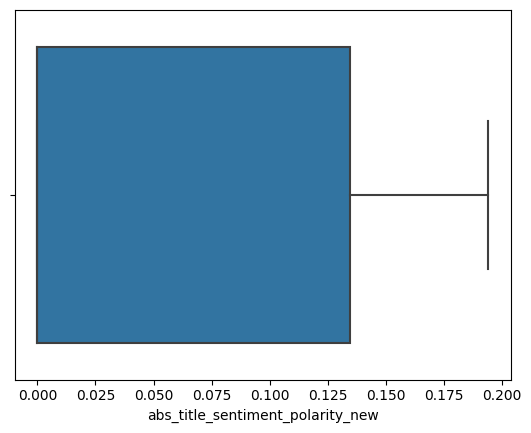

In [ ]:
# Checking Outliers Again
num_cols = df2_num_add.select_dtypes(['int64', 'float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(data=df2_num_add, x=num_cols[i], orient="h")
    plt.show()

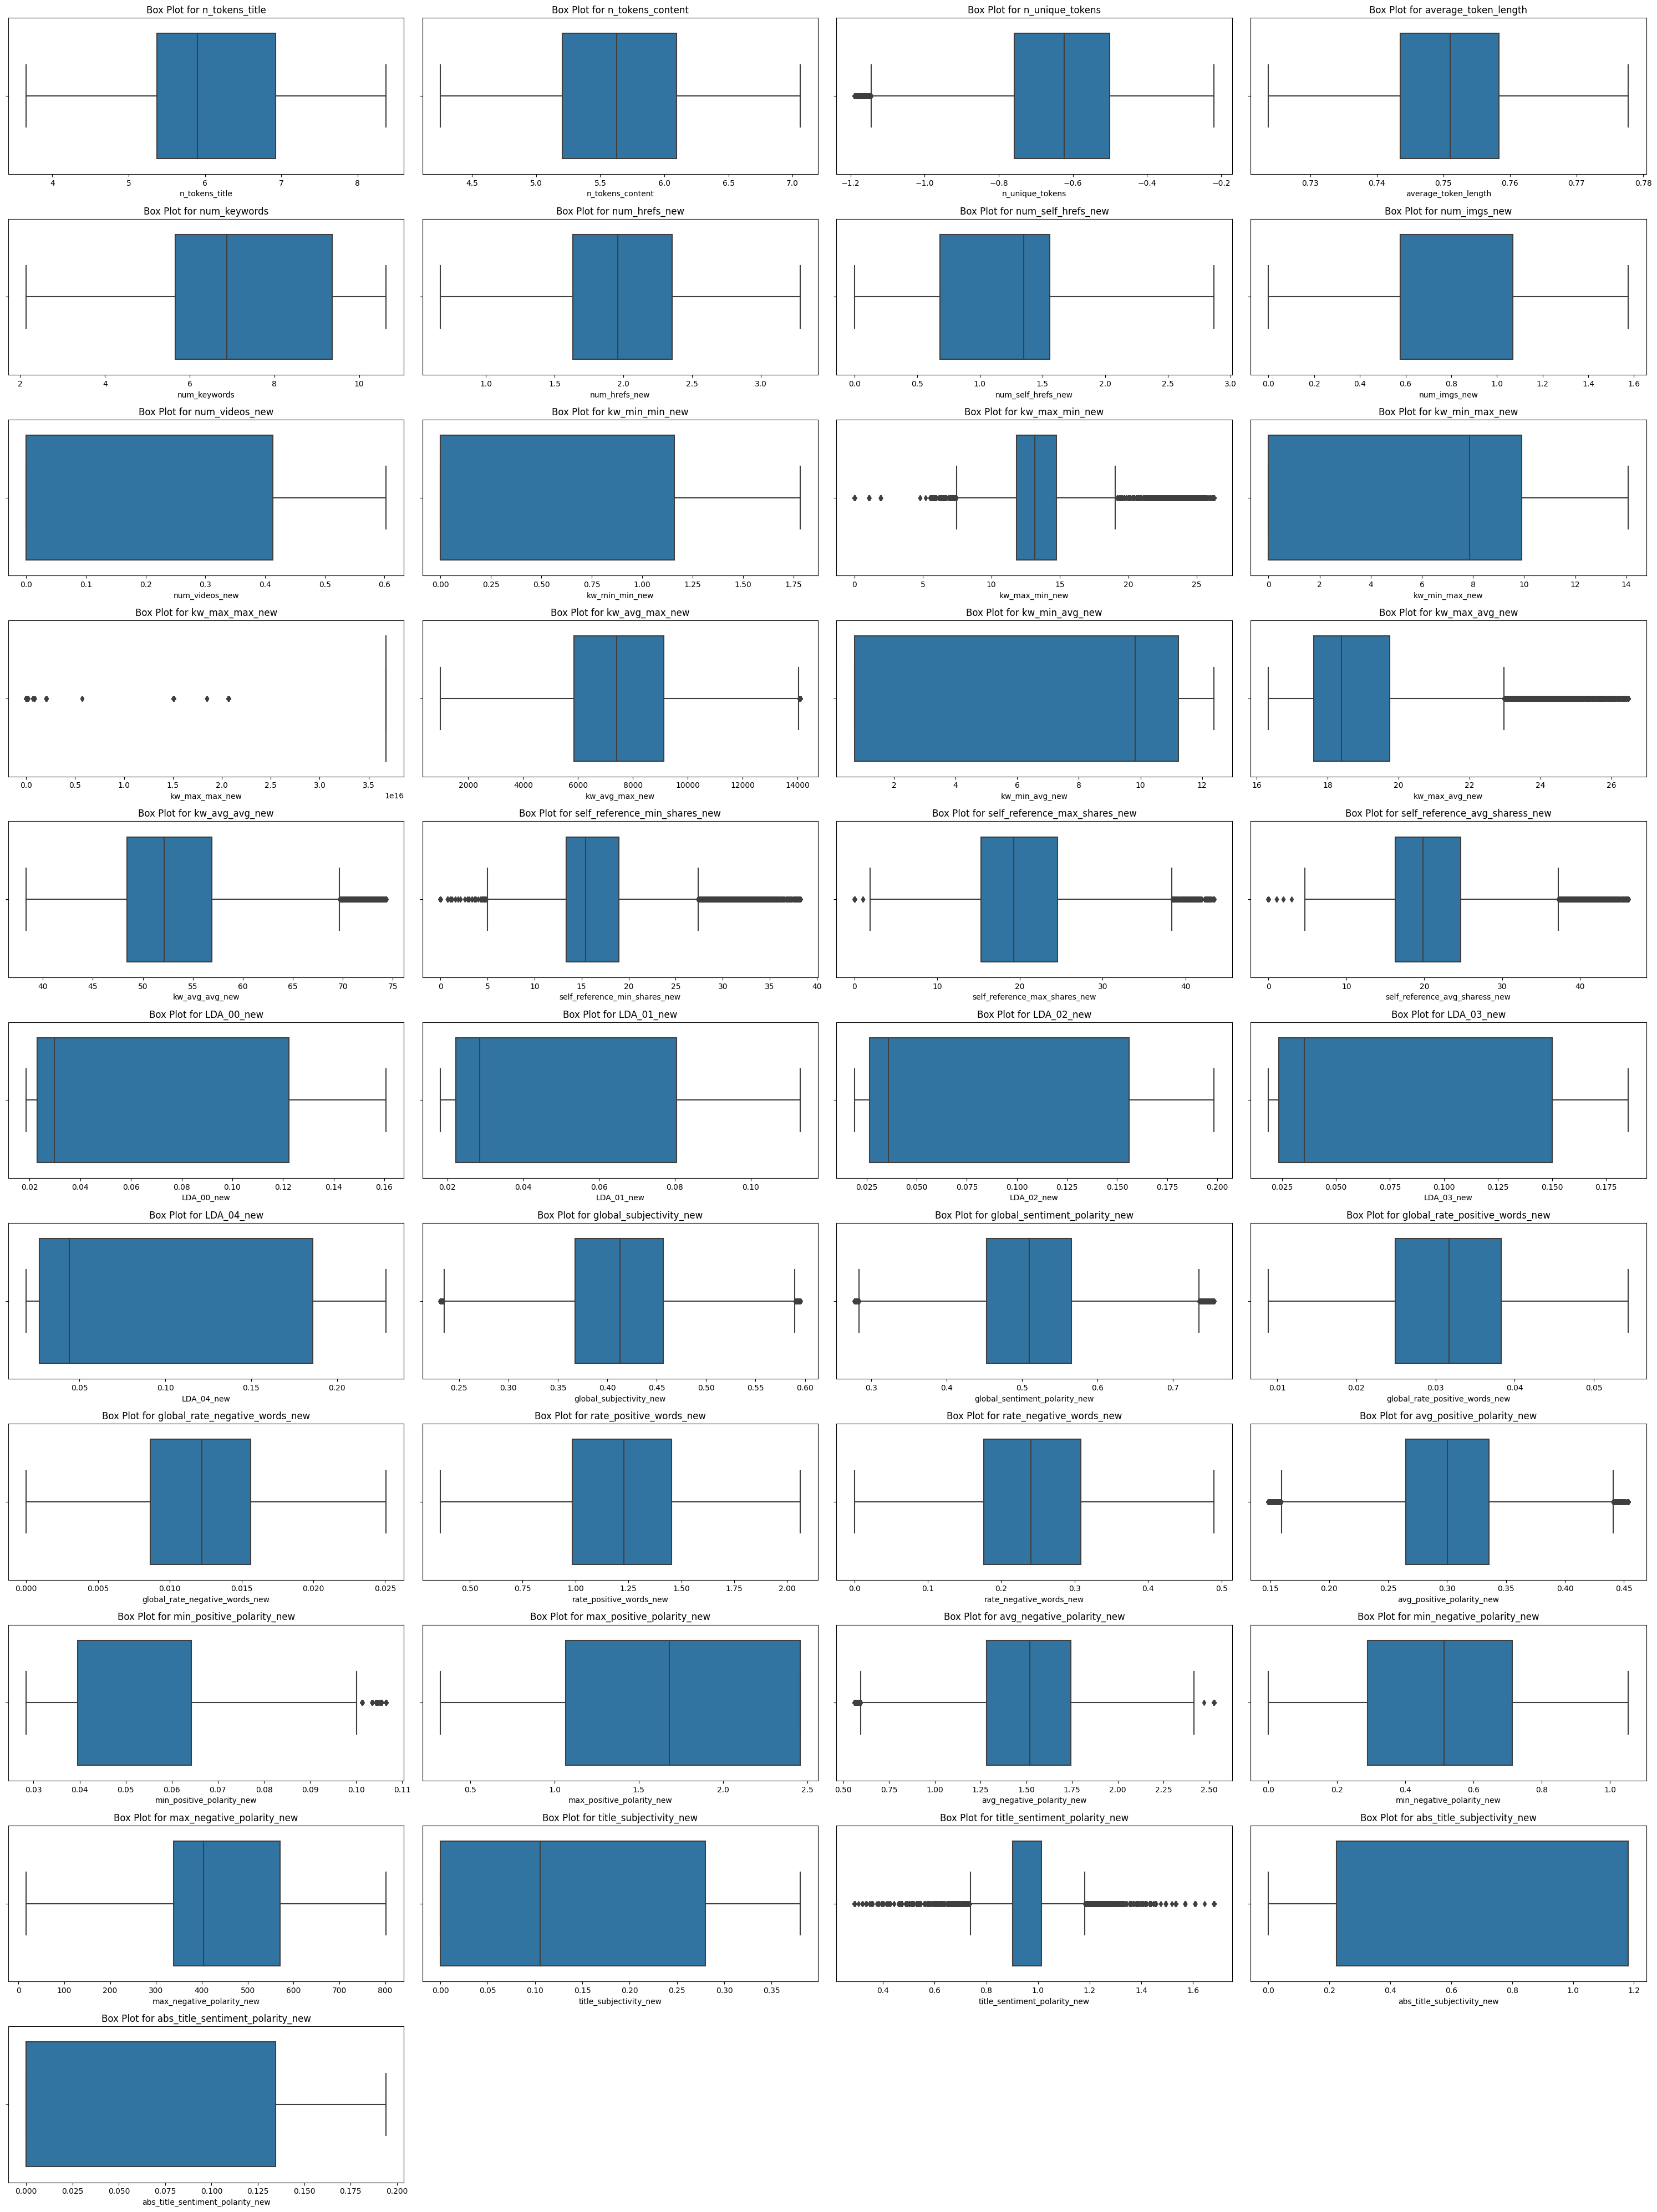

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your numerical columns
num_cols = df2_num_add.select_dtypes(['int64', 'float64']).columns

# Create a grid of box plots for all numerical features
plt.figure(figsize=(30,40))

for i, col in enumerate(num_cols, 1):
    plt.subplot(11,4,i)  # Adjust the subplot arrangement as needed
    sns.boxplot(data=df2_num_add, x=col, orient="h")
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Combining numeric features and catogorical features.
df_final=pd.concat([df2_num_add,df2_cat],axis=1)
df_final.shape

(39518, 55)

In [ ]:
df_final=df_final.dropna()

In [ ]:
df_final.shape

(37408, 55)

In [ ]:
df_final.isnull().sum()

n_tokens_title                      0
n_tokens_content                    0
n_unique_tokens                     0
average_token_length                0
num_keywords                        0
num_hrefs_new                       0
num_self_hrefs_new                  0
num_imgs_new                        0
num_videos_new                      0
kw_min_min_new                      0
kw_max_min_new                      0
kw_min_max_new                      0
kw_max_max_new                      0
kw_avg_max_new                      0
kw_min_avg_new                      0
kw_max_avg_new                      0
kw_avg_avg_new                      0
self_reference_min_shares_new       0
self_reference_max_shares_new       0
self_reference_avg_sharess_new      0
LDA_00_new                          0
LDA_01_new                          0
LDA_02_new                          0
LDA_03_new                          0
LDA_04_new                          0
global_subjectivity_new             0
global_senti

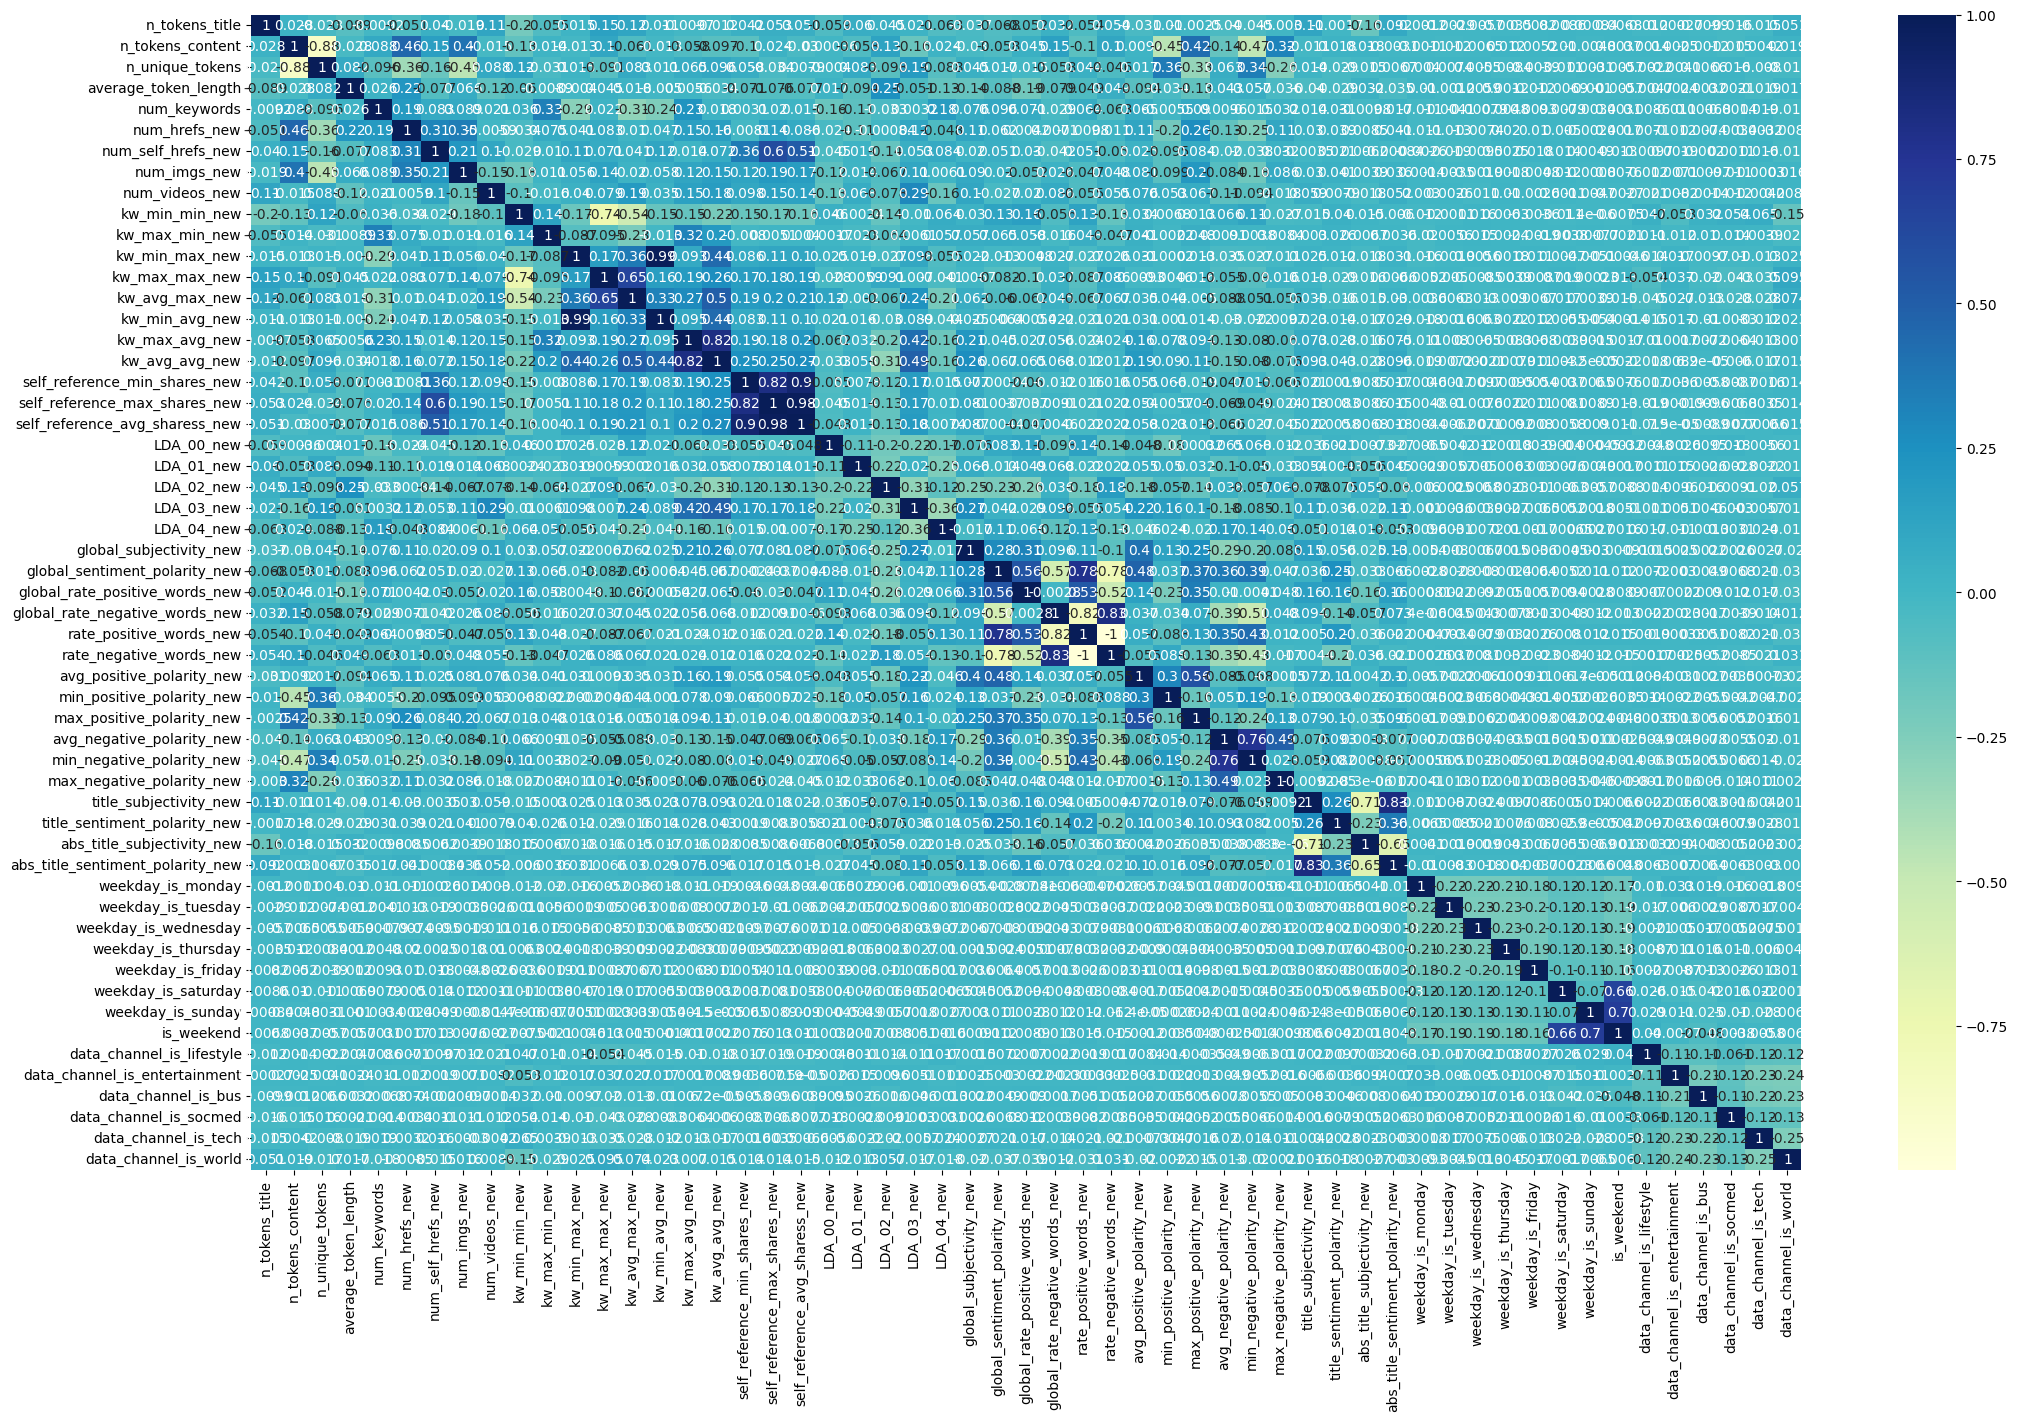

In [ ]:
#checking the correlation among the variables after performing Boxcox transformation
plt.figure(figsize = (25,15))
sns.heatmap(df_final.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Adding targeted value to the df_final
target = df['shares']
df_final_=pd.concat([df_final,target],axis=1)

In [ ]:
df_final_.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [ ]:
df_final_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   n_tokens_title                    37408 non-null  float64
 1   n_tokens_content                  37408 non-null  float64
 2   n_unique_tokens                   37408 non-null  float64
 3   average_token_length              37408 non-null  float64
 4   num_keywords                      37408 non-null  float64
 5   num_hrefs_new                     37408 non-null  float64
 6   num_self_hrefs_new                37408 non-null  float64
 7   num_imgs_new                      37408 non-null  float64
 8   num_videos_new                    37408 non-null  float64
 9   kw_min_min_new                    37408 non-null  float64
 10  kw_max_min_new                    37408 non-null  float64
 11  kw_min_max_new                    37408 non-null  float64
 12  kw_m

In [ ]:
df_final_.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
LDA_00_new                          1055
LDA_01_new                          1055
LDA_02_new                          1055
LDA_03_new                          1055
LDA_04_new      

In [ ]:
df_final1 = df_final_.dropna()

In [ ]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37408 entries, 0 to 38462
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   n_tokens_title                    37408 non-null  float64
 1   n_tokens_content                  37408 non-null  float64
 2   n_unique_tokens                   37408 non-null  float64
 3   average_token_length              37408 non-null  float64
 4   num_keywords                      37408 non-null  float64
 5   num_hrefs_new                     37408 non-null  float64
 6   num_self_hrefs_new                37408 non-null  float64
 7   num_imgs_new                      37408 non-null  float64
 8   num_videos_new                    37408 non-null  float64
 9   kw_min_min_new                    37408 non-null  float64
 10  kw_max_min_new                    37408 non-null  float64
 11  kw_min_max_new                    37408 non-null  float64
 12  kw_m

In [ ]:
# dividing data to train test:
X = df_final1.drop(['shares'], axis=1)
y = df_final1["shares"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(26185, 55) (26185,)
(11223, 55) (11223,)


In [ ]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr)
rfe = rfe.fit(X_train, Y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 26),
 ('n_tokens_content', False, 23),
 ('n_unique_tokens', True, 1),
 ('average_token_length', True, 1),
 ('num_keywords', False, 17),
 ('num_hrefs_new', False, 14),
 ('num_self_hrefs_new', True, 1),
 ('num_imgs_new', True, 1),
 ('num_videos_new', True, 1),
 ('kw_min_min_new', False, 6),
 ('kw_max_min_new', False, 25),
 ('kw_min_max_new', False, 15),
 ('kw_max_max_new', False, 29),
 ('kw_avg_max_new', False, 28),
 ('kw_min_avg_new', False, 16),
 ('kw_max_avg_new', False, 18),
 ('kw_avg_avg_new', False, 24),
 ('self_reference_min_shares_new', False, 21),
 ('self_reference_max_shares_new', False, 19),
 ('self_reference_avg_sharess_new', False, 20),
 ('LDA_00_new', True, 1),
 ('LDA_01_new', True, 1),
 ('LDA_02_new', False, 9),
 ('LDA_03_new', True, 1),
 ('LDA_04_new', True, 1),
 ('global_subjectivity_new', True, 1),
 ('global_sentiment_polarity_new', True, 1),
 ('global_rate_positive_words_new', False, 5),
 ('global_rate_negative_words_new', True, 1),
 ('rate_p

In [ ]:
#The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['n_unique_tokens', 'average_token_length', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'avg_positive_polarity_new', 'min_positive_polarity_new',
       'avg_negative_polarity_new', 'title_sentiment_polarity_new',
       'weekday_is_monday', 'weekday_is_saturday', 'is_weekend',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [ ]:
# Passing the above columns to X train and create a new df
X_train_rfe = X_train[col]
X_train_rfe.head()

n_unique_tokens  average_token_length  num_self_hrefs_new  \
22279        -0.513387              0.756935            1.873050   
14314        -0.999996              0.747168            1.075131   
752          -0.338964              0.761148            1.729862   
15276        -0.392640              0.737836            0.000000   
32933        -0.456106              0.745709            2.201039   

       num_imgs_new  num_videos_new  LDA_00_new  LDA_01_new  LDA_03_new  \
22279      0.576589        0.000000    0.155125    0.094520    0.085491   
14314      1.517688        0.000000    0.148110    0.024960    0.026200   
752        0.000000        0.412948    0.022951    0.022516    0.181718   
15276      0.576589        0.412948    0.018828    0.018180    0.018822   
32933      0.825132        0.000000    0.095584    0.024950    0.112728   

       LDA_04_new  global_subjectivity_new  ...  title_sentiment_polarity_new  \
22279    0.019040                 0.464804  ...                      1.224264   
14314    0.191148                 0.450822  ...                      0.957617   
752      0.023498                 0.391633  ...                      0.901426   
15276    0.221549                 0.358382  ...                      0.901426   
32933    0.209751                 0.500142  ...                      0.901426   

       weekday_is_monday  weekday_is_saturday  is_weekend  \
22279                0.0                  0.0         1.0   
14314                0.0                  0.0         0.0   
752                  1.0                  0.0         0.0   
15276                0.0                  0.0         0.0   
32933                0.0                  0.0         0.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
22279                        0.0                            1.0   
14314                        0.0                            0.0   
752                          0.0                            1.0   
15276                        0.0                            1.0   
32933                        0.0                            0.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
22279                  0.0                     0.0                   0.0   
14314                  0.0                     0.0                   0.0   
752                    0.0                     0.0                   0.0   
15276                  0.0                     0.0                   0.0   
32933                  0.0                     0.0                   0.0   

       data_channel_is_world  
22279                    0.0  
14314                    1.0  
752                      0.0  
15276                    0.0  
32933                    1.0  

[5 rows x 27 columns]

In [ ]:
# Passing the above columns to X test and create a new df
X_test_rfe = X_test[col]
X_test_rfe.head()

n_unique_tokens  average_token_length  num_self_hrefs_new  \
31790        -0.734582              0.748977            1.729862   
22059        -0.477660              0.764507            1.075131   
31120        -0.963335              0.739587            2.366922   
8182         -0.686742              0.765911            1.729862   
22500        -0.618910              0.764351            1.349045   

       num_imgs_new  num_videos_new  LDA_00_new  LDA_01_new  LDA_03_new  \
31790      0.970793        0.507149    0.018671    0.018401    0.018891   
22059      1.424564        0.000000    0.018655    0.018175    0.185274   
31120      0.576589        0.000000    0.022944    0.022191    0.023170   
8182       0.576589        0.000000    0.115645    0.022255    0.023235   
22500      0.576589        0.000000    0.034883    0.097931    0.035471   

       LDA_04_new  global_subjectivity_new  ...  title_sentiment_polarity_new  \
31790    0.019301                 0.450648  ...                      0.654826   
22059    0.019026                 0.454599  ...                      0.901426   
31120    0.227732                 0.417030  ...                      0.901426   
8182     0.207069                 0.454498  ...                      0.901426   
22500    0.036254                 0.387973  ...                      0.901426   

       weekday_is_monday  weekday_is_saturday  is_weekend  \
31790                0.0                  1.0         1.0   
22059                0.0                  0.0         0.0   
31120                0.0                  0.0         0.0   
8182                 1.0                  0.0         0.0   
22500                0.0                  0.0         0.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31790                        0.0                            0.0   
22059                        0.0                            1.0   
31120                        0.0                            0.0   
8182                         0.0                            0.0   
22500                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31790                  1.0                     0.0                   0.0   
22059                  0.0                     0.0                   0.0   
31120                  0.0                     0.0                   0.0   
8182                   0.0                     0.0                   0.0   
22500                  0.0                     0.0                   0.0   

       data_channel_is_world  
31790                    0.0  
22059                    0.0  
31120                    1.0  
8182                     1.0  
22500                    0.0  

[5 rows x 27 columns]

In [ ]:
# Now applying PCA with the selected columns df
pca=PCA(random_state=42)
pca.fit(X_train_rfe)

PCA(random_state=42)

In [ ]:
#creating a dataframe for PCA on selected RFE columns (for trainset)
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Feature':colnames})

In [ ]:
#creating a dataframe for PCA on selected RFE columns  (for testset)
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [ ]:
#Creating a new df on 11 features for train data
X_train_pca = X_train_rfe[pca_df.Feature[:11]]
X_train_pca.head()

n_unique_tokens  average_token_length  num_self_hrefs_new  \
22279        -0.513387              0.756935            1.873050   
14314        -0.999996              0.747168            1.075131   
752          -0.338964              0.761148            1.729862   
15276        -0.392640              0.737836            0.000000   
32933        -0.456106              0.745709            2.201039   

       num_imgs_new  num_videos_new  LDA_00_new  LDA_01_new  LDA_03_new  \
22279      0.576589        0.000000    0.155125    0.094520    0.085491   
14314      1.517688        0.000000    0.148110    0.024960    0.026200   
752        0.000000        0.412948    0.022951    0.022516    0.181718   
15276      0.576589        0.412948    0.018828    0.018180    0.018822   
32933      0.825132        0.000000    0.095584    0.024950    0.112728   

       LDA_04_new  global_subjectivity_new  global_sentiment_polarity_new  
22279    0.019040                 0.464804                       0.542451  
14314    0.191148                 0.450822                       0.537141  
752      0.023498                 0.391633                       0.668108  
15276    0.221549                 0.358382                       0.667357  
32933    0.209751                 0.500142                       0.698184

In [ ]:
#Creating a new df on 11 features for test data
X_test_pca = X_test_rfe[pca_df1.Feature[:11]]
X_test_pca.head()

n_unique_tokens  average_token_length  num_self_hrefs_new  \
31790        -0.734582              0.748977            1.729862   
22059        -0.477660              0.764507            1.075131   
31120        -0.963335              0.739587            2.366922   
8182         -0.686742              0.765911            1.729862   
22500        -0.618910              0.764351            1.349045   

       num_imgs_new  num_videos_new  LDA_00_new  LDA_01_new  LDA_03_new  \
31790      0.970793        0.507149    0.018671    0.018401    0.018891   
22059      1.424564        0.000000    0.018655    0.018175    0.185274   
31120      0.576589        0.000000    0.022944    0.022191    0.023170   
8182       0.576589        0.000000    0.115645    0.022255    0.023235   
22500      0.576589        0.000000    0.034883    0.097931    0.035471   

       LDA_04_new  global_subjectivity_new  global_sentiment_polarity_new  
31790    0.019301                 0.450648                       0.499595  
22059    0.019026                 0.454599                       0.609695  
31120    0.227732                 0.417030                       0.542594  
8182     0.207069                 0.454498                       0.472451  
22500    0.036254                 0.387973                       0.564764

In [ ]:
# now doing final PCA with 9 components
pca_final = PCA(n_components=9)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(26185, 9)

In [ ]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(11223, 9)

In [ ]:
# Linear Regression
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)

# predict the train and test pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.values.reshape(-1,),test_predict)

Train metrics
r2:  0.0009
MAE:  3157.5306
MSE:  126947433.8736
RMSE:  11267.0952

Test metrics
r2:  -0.0008
MAE:  3201.5579
MSE:  161073991.427
RMSE:  12691.4929


In [ ]:
# Ridge Regression
def ridge_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# Instantiate
ridge_regression = Ridge()

# Fit a line
ridge_regression.fit(df_train_pca, Y_train)

# predict the train and test pca data
train_predict = ridge_regression.predict(df_train_pca)
test_predict = ridge_regression.predict(df_test_pca)

print("Train metrics")
ridge_results(Y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
ridge_results(Y_test.values.reshape(-1,),test_predict)

Train metrics
r2:  0.0009
MAE:  3157.461
MSE:  126947439.3179
RMSE:  11267.0954

Test metrics
r2:  -0.0008
MAE:  3201.5029
MSE:  161073115.3565
RMSE:  12691.4584


In [ ]:
# RandomForestRegressor
def RandomForestRegressor_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# Instantiate
randomForest_regression = RandomForestRegressor()

# Fit a line
randomForest_regression.fit(df_train_pca, Y_train)

# predict the train and test pca data
train_predict = randomForest_regression.predict(df_train_pca)
test_predict = randomForest_regression.predict(df_test_pca)

print("Train metrics")
RandomForestRegressor_results(Y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
RandomForestRegressor_results(Y_test.values.reshape(-1,),test_predict)

Train metrics
r2:  0.8585
MAE:  1323.3124
MSE:  17974731.8534
RMSE:  4239.6618

Test metrics
r2:  -0.2165
MAE:  3640.6884
MSE:  195798192.2759
RMSE:  13992.7907
